# Problem Statement:
As a data scientist working at Pharmacy company which provides services 24/7, the ultimate goal is to tease out meaningful and actionable insights from patient-level collected data. and helping company to be more efficient, to influence diagnostic and treatment processes, to map the spread of a pandemic.
One of the best examples of data scientists making a meaningful difference at a global level is in the response to the COVID-19 pandemic, where they have improved information collection, provided ongoing and accurate estimates of infection spread and health system demand, and assessed the effectiveness of government policies.
The company wants to know:
• Which variables are significant in predicting the reason for hospitalization for different regions
• How well some variables like viral load, smoking, Severity Level describe the hospitalization charges
We need to analyse how different factors are impacting on hospitalization charges for patients with different parameters such as gender, smoking, viral load, severity level, age.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples

In [ ]:
data = pd.read_csv(r"hospitals.csv")

In [ ]:
data.head()

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667


In [ ]:
data.duplicated().sum()

0

There are no duplicated rows for given dataset

In [ ]:
data.drop(columns = data.columns[0], axis=1, inplace=True)

In [ ]:
data.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667


In [ ]:
data.shape

(1338, 7)

In [ ]:
data.dtypes

age                          int64
sex                         object
smoker                      object
region                      object
viral load                 float64
severity level               int64
hospitalization charges      int64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1338 non-null   int64  
 1   sex                      1338 non-null   object 
 2   smoker                   1338 non-null   object 
 3   region                   1338 non-null   object 
 4   viral load               1338 non-null   float64
 5   severity level           1338 non-null   int64  
 6   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 73.3+ KB


In [ ]:
data.nunique()

age                          47
sex                           2
smoker                        2
region                        4
viral load                  462
severity level                6
hospitalization charges    1320
dtype: int64

In [ ]:
data.describe(include='all')

,age,sex,smoker,region,viral load,severity level,hospitalization charges
count,1338.000000,1338,1338,1338,1338.000000,1338.000000,1338.000000
unique,NaN,2,2,4,NaN,NaN,NaN
top,NaN,male,no,southeast,NaN,NaN,NaN
freq,NaN,676,1064,364,NaN,NaN,NaN
mean,39.207025,NaN,NaN,NaN,10.221233,1.094918,33176.058296
std,14.049960,NaN,NaN,NaN,2.032796,1.205493,30275.029296
min,18.000000,NaN,NaN,NaN,5.320000,0.000000,2805.000000
25%,27.000000,NaN,NaN,NaN,8.762500,0.000000,11851.000000
50%,39.000000,NaN,NaN,NaN,10.130000,1.000000,23455.000000
75%,51.000000,NaN,NaN,NaN,11.567500,2.000000,41599.500000


In [ ]:
data.describe(include=[np.number])

,age,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,10.221233,1.094918,33176.058296
std,14.049960,2.032796,1.205493,30275.029296
min,18.000000,5.320000,0.000000,2805.000000
25%,27.000000,8.762500,0.000000,11851.000000
50%,39.000000,10.130000,1.000000,23455.000000
75%,51.000000,11.567500,2.000000,41599.500000
max,64.000000,17.710000,5.000000,159426.000000


In [ ]:
data.describe(include=[np.object])

C:\Users\shwet\AppData\Local\Temp/ipykernel_27192/1422700444.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data.describe(include=[np.object])


,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [ ]:
data['severity level'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: severity level, dtype: int64

In [ ]:
data.isna().sum()/len(data)*100

age                        0.0
sex                        0.0
smoker                     0.0
region                     0.0
viral load                 0.0
severity level             0.0
hospitalization charges    0.0
dtype: float64

In [ ]:
toCategory = ['sex', 'smoker', 'region', 'severity level']
for x in toCategory:
    data[x] = data[x].astype('category')

In [ ]:
category = pd.cut(data.age,bins=[17,24,54,64],labels=['18-24', '25-54', '55-64'])
data.insert(1, 'age group', category)

In [ ]:
toCategory.append('age group')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      1338 non-null   int64   
 1   age group                1338 non-null   category
 2   sex                      1338 non-null   category
 3   smoker                   1338 non-null   category
 4   region                   1338 non-null   category
 5   viral load               1338 non-null   float64 
 6   severity level           1338 non-null   category
 7   hospitalization charges  1338 non-null   int64   
dtypes: category(5), float64(1), int64(2)
memory usage: 38.8 KB


In [ ]:
data.nunique()

age                          47
age group                     3
sex                           2
smoker                        2
region                        4
viral load                  462
severity level                6
hospitalization charges    1320
dtype: int64

In [ ]:
for x in toCategory:
    print('\033[1m' + "Unique values for column " + x  + '\033[0m')
    print("Number of Unique values: " + str(data[x].nunique()))
    print(data[x].unique())
    print()
    print('\033[1m' + "Value Counts for Column " + x  + '\033[0m')
    print(data[x].value_counts())
    print()
    print('\033[1m' + "Normalized Value Counts for Column " + x  + '\033[0m')
    print(data[x].value_counts(normalize=True).round(2))
    print()
    print('\033[1m' + "-------------------------------------------------------------------------------------------" + '\033[0m')
    print()

Unique values for column sex
Number of Unique values: 2
['female', 'male']
Categories (2, object): ['female', 'male']

Value Counts for Column sex
male      676
female    662
Name: sex, dtype: int64

Normalized Value Counts for Column sex
male      0.51
female    0.49
Name: sex, dtype: float64

-------------------------------------------------------------------------------------------

Unique values for column smoker
Number of Unique values: 2
['yes', 'no']
Categories (2, object): ['no', 'yes']

Value Counts for Column smoker
no     1064
yes     274
Name: smoker, dtype: int64

Normalized Value Counts for Column smoker
no     0.8
yes    0.2
Name: smoker, dtype: float64

-------------------------------------------------------------------------------------------

Unique values for column region
Number of Unique values: 4
['southwest', 'southeast', 'northwest', 'northeast']
Categories (4, object): ['northeast', 'northwest', 'southeast', 'southwest']

Value Counts for Column region
southeas

In [ ]:
data.groupby("age group").agg(['count', 'mean', 'median', 'max', 'min']).round(2)

age                       viral load                             \
          count   mean median max min      count   mean median    max   min   
age group                                                                     
18-24       278  20.27   20.0  24  18        278  10.01  10.04  17.71  5.32   
25-54       818  39.69   40.0  54  25        818  10.18  10.06  16.02  5.60   
55-64       242  59.33   59.0  64  55        242  10.59  10.61  16.35  6.11   

          hospitalization charges                                    
                            count      mean   median     max    min  
age group                                                            
18-24                         278  22528.37   6143.5  111253   2805  
25-54                         818  32917.04  21217.0  159426   5344  
55-64                         242  46283.21  33067.0  131477  25537

In [ ]:
data.groupby(["age group", "sex"]).agg(['count', 'mean', 'median', 'max', 'min']).round(2)

age                       viral load                       \
                 count   mean median max min      count   mean median    max   
age group sex                                                                  
18-24     female   134  20.28   20.0  24  18        134  10.04  10.04  14.25   
          male     144  20.25   20.0  24  18        144   9.99   9.98  17.71   
25-54     female   405  39.83   40.0  54  25        405  10.08   9.94  16.02   
          male     413  39.55   40.0  54  25        413  10.28  10.17  15.91   
55-64     female   123  59.36   59.0  64  55        123  10.35  10.39  14.67   
          male     119  59.31   59.0  64  55        119  10.83  10.92  16.35   

                       hospitalization charges                             \
                   min                   count      mean   median     max   
age group sex                                                               
18-24     female  5.60                     134  21574.92   6787.5  102260   
          male    5.32                     144  23415.60   5197.0  111253   
25-54     female  5.73                     405  30696.60  20709.0  159426   
          male    5.60                     413  35094.48  21511.0  156482   
55-64     female  6.11                     123  44548.72  33628.0  122061   
          male    6.11                     119  48076.02  32457.0  131477   

                         
                    min  
age group sex            
18-24     female   4019  
          male     2805  
25-54     female   6582  
          male     5344  
55-64     female  26761  
          male    25537

In [ ]:
data.groupby(["age group", "sex", "smoker"]).agg(['count', 'mean', 'median', 'max', 'min']).round(2)

age                       viral load                \
                        count   mean median max min      count   mean median   
age group sex    smoker                                                        
18-24     female no       107  20.26   20.0  24  18        107  10.11  10.10   
                 yes       27  20.37   20.0  24  18         27   9.79   9.50   
          male   no       111  20.26   20.0  24  18        111   9.75   9.63   
                 yes       33  20.21   19.0  24  18         33  10.77  10.58   
25-54     female no       335  39.83   40.0  54  25        335  10.14   9.97   
                 yes       70  39.86   41.0  54  25         70   9.82   9.30   
          male   no       311  39.62   40.0  54  25        311  10.27  10.10   
                 yes      102  39.34   39.0  54  25        102  10.31  10.22   
55-64     female no       105  59.06   59.0  64  55        105  10.38  10.45   
                 yes       18  61.11   61.5  64  55         18  10.19  10.18   
          male   no        95  59.21   59.0  64  55         95  10.81  10.92   
                 yes       24  59.71   60.0  64  55         24  10.92  10.80   

                                     hospitalization charges             \
                           max   min                   count       mean   
age group sex    smoker                                                   
18-24     female no      13.50  5.60                     107   10780.49   
                 yes     14.25  6.84                      27   64352.85   
          male   no      17.71  5.32                     111    8467.48   
                 yes     17.53  5.76                      33   73695.67   
25-54     female no      16.02  5.76                     335   21018.63   
                 yes     15.87  5.73                      70   77012.56   
          male   no      15.91  5.60                     311   20154.64   
                 yes     15.18  6.43                     102   80646.34   
55-64     female no      14.67  6.11                     105   36073.21   
                 yes     12.57  7.66                      18   93989.17   
          male   no      16.35  6.11                      95   34155.09   
                 yes     14.04  6.65                      24  103179.67   

                                                  
                           median     max    min  
age group sex    smoker                           
18-24     female no        6143.0   65047   4019  
                 yes      50418.0  102260  34611  
          male   no        4593.0   69311   2805  
                 yes      85758.0  111253  32074  
25-54     female no       18395.0   83680   6582  
                 yes      61320.0  159426  36139  
          male   no       17352.0   80272   5344  
                 yes      90402.5  156482  39545  
55-64     female no       32660.0   92277  26761  
                 yes      93151.0  122061  64197  
          male   no       31394.0   75650  25537  
                 yes     115912.0  131477  56032

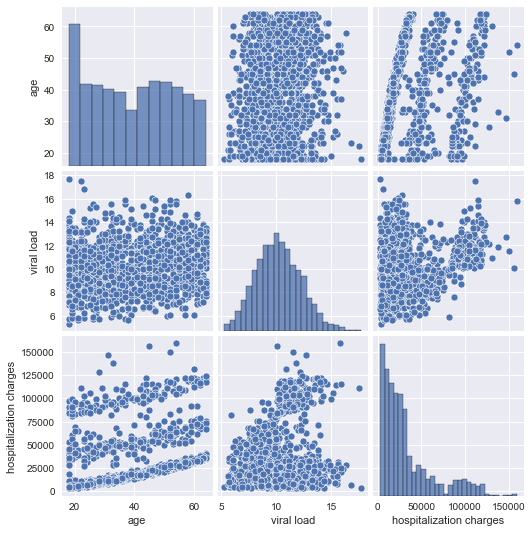

In [ ]:
sns.pairplot(data)

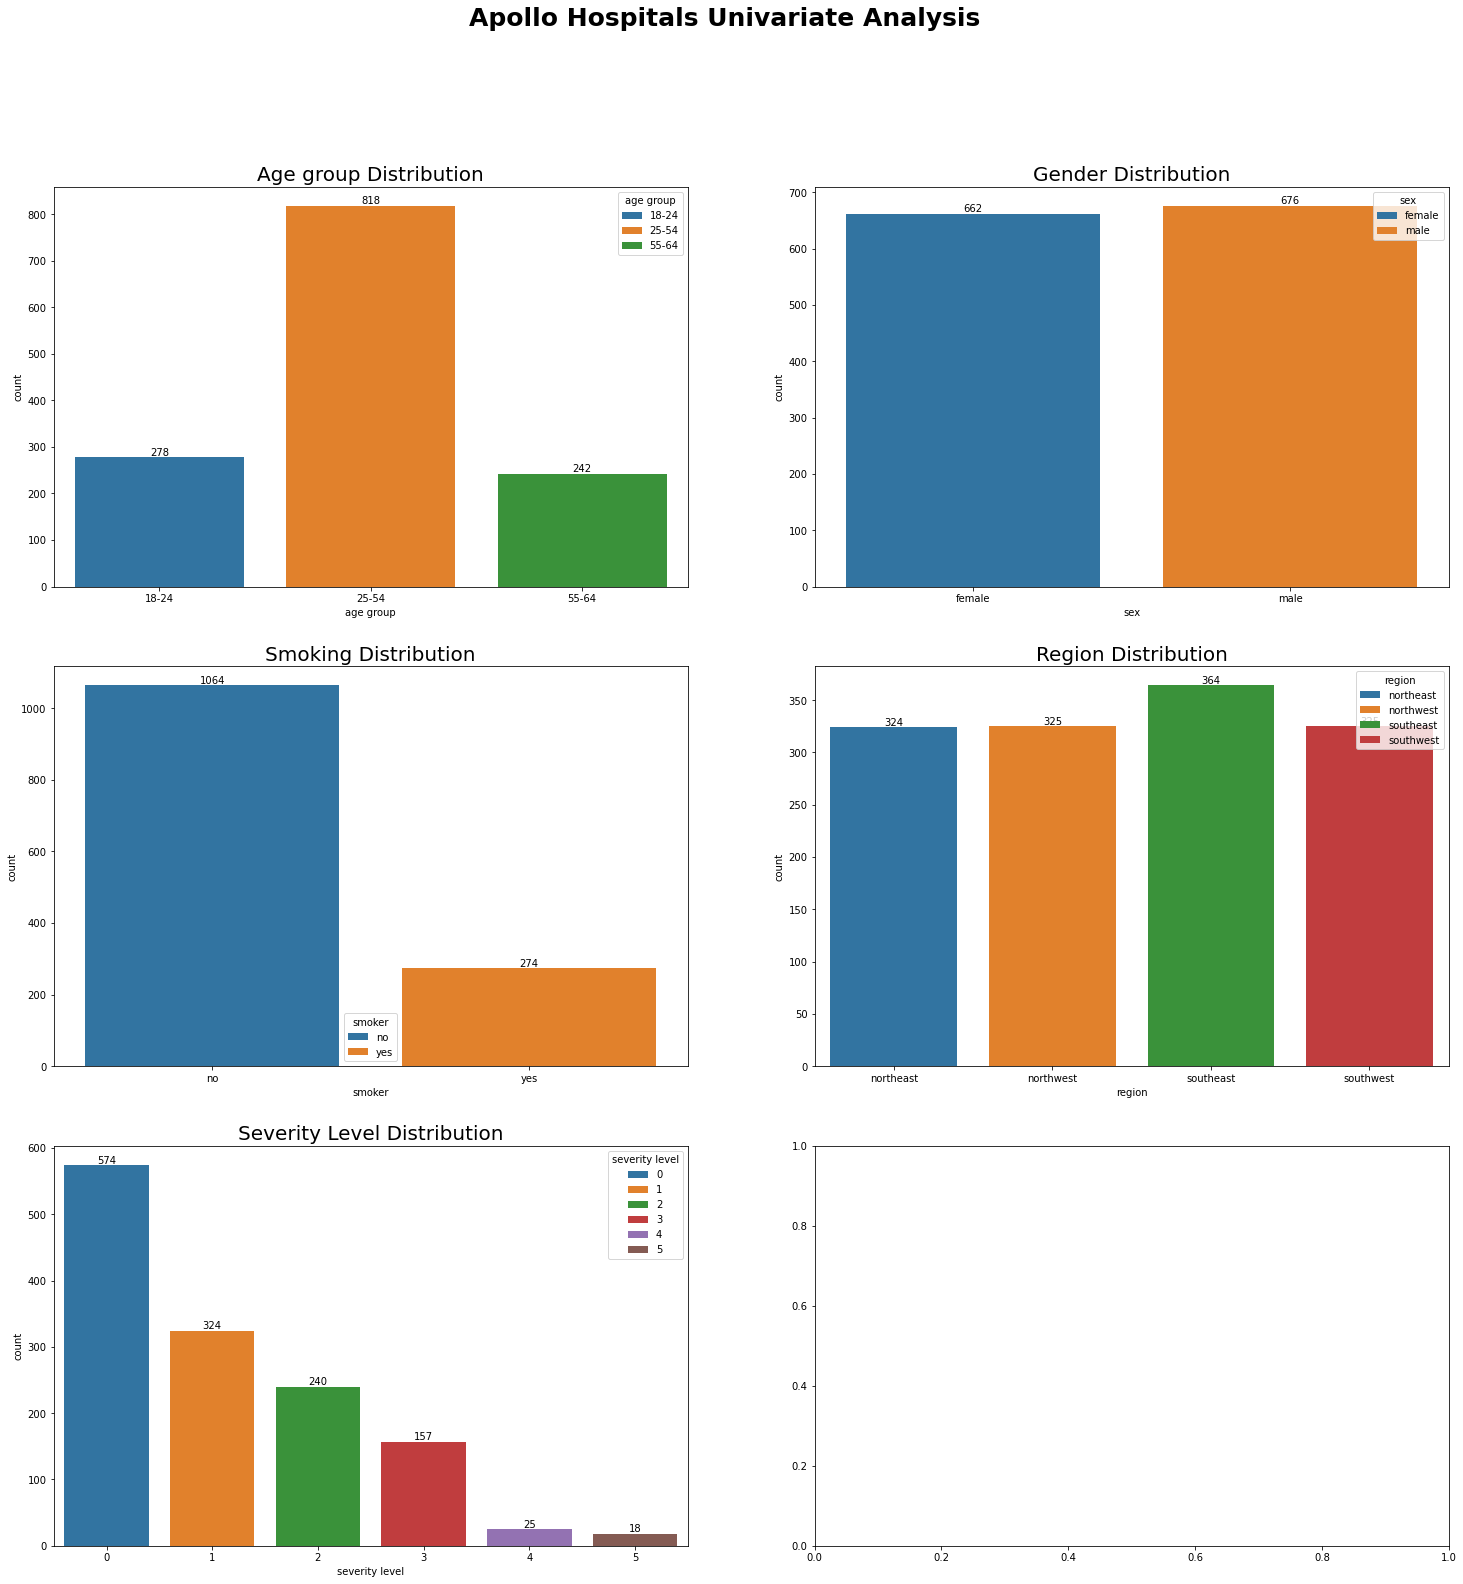

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(25, 25), sharey=False)
fig.suptitle("Apollo Hospitals Univariate Analysis " , fontsize=25, fontweight='bold')
graph = sns.countplot(x = 'age group', hue= 'age group', data= data, dodge = False , ax = axs[0, 0])
for i in graph.containers:
    graph.bar_label(i,)
graph.set_title("Age group Distribution", fontsize = 20)
graph2 = sns.countplot(x = 'sex', hue = 'sex', data = data , dodge=False, ax = axs[0, 1])
for i in graph2.containers:
    graph2.bar_label(i,)
graph2.set_title("Gender Distribution", fontsize = 20)
graph3 = sns.countplot(x = 'smoker', hue = 'smoker' ,data = data , dodge=False, ax = axs[1, 0])
for i in graph3.containers:
    graph3.bar_label(i,)
graph3.set_title("Smoking Distribution", fontsize = 20)
graph4 = sns.countplot(x = 'region', hue= 'region', data= data, dodge = False , ax = axs[1,1])
for i in graph4.containers:
    graph4.bar_label(i,)
graph4.set_title("Region Distribution", fontsize = 20)
graph5 = sns.countplot(x = 'severity level', hue = 'severity level', data = data , dodge=False, ax = axs[2, 0])
for i in graph5.containers:
    graph5.bar_label(i,)
graph5.set_title("Severity Level Distribution", fontsize = 20)
plt.show()

In [ ]:
data.columns[data.dtypes == 'category']

Index(['age group', 'sex', 'smoker', 'region', 'severity level'], dtype='object')

In [ ]:
def bivariate_plot(huedata):
    fig, axs = plt.subplots(1, 4, figsize=(25, 10), sharey=False)
    fig.suptitle("Apollo Hospitals Bivariate Analysis wrt " + huedata , fontsize=20, fontweight='bold')
    s = 0
    for i in range(len(data.columns[data.dtypes == 'category'])):
        for t in range(1):
            if data.columns[data.dtypes == 'category'][i] != huedata:
                graph = sns.countplot(x = data.columns[data.dtypes == 'category'][i] , hue= huedata, data= data , ax = axs[s])
                for z in graph.containers:
                    graph.bar_label(z,)
                s += 1
                graph.set_title(data.columns[data.dtypes == 'category'][i] + " Distribution wrt "+ huedata, fontsize = 12)


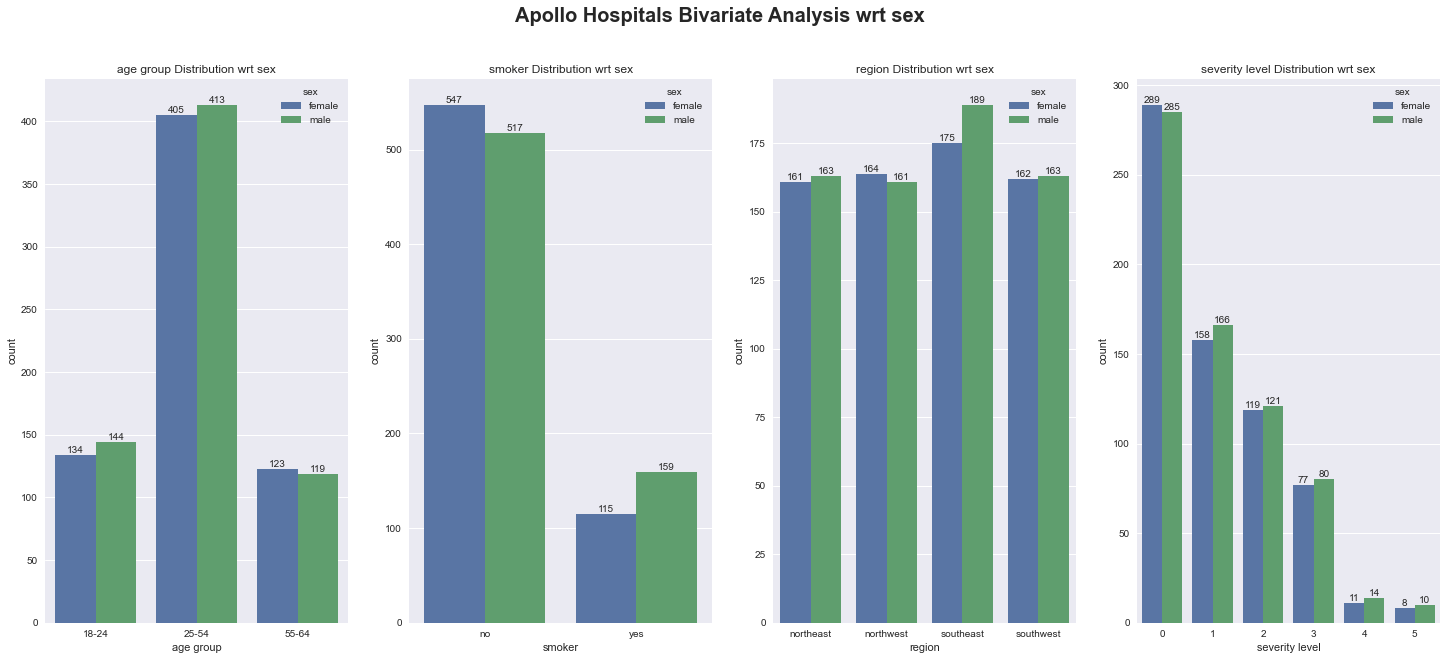

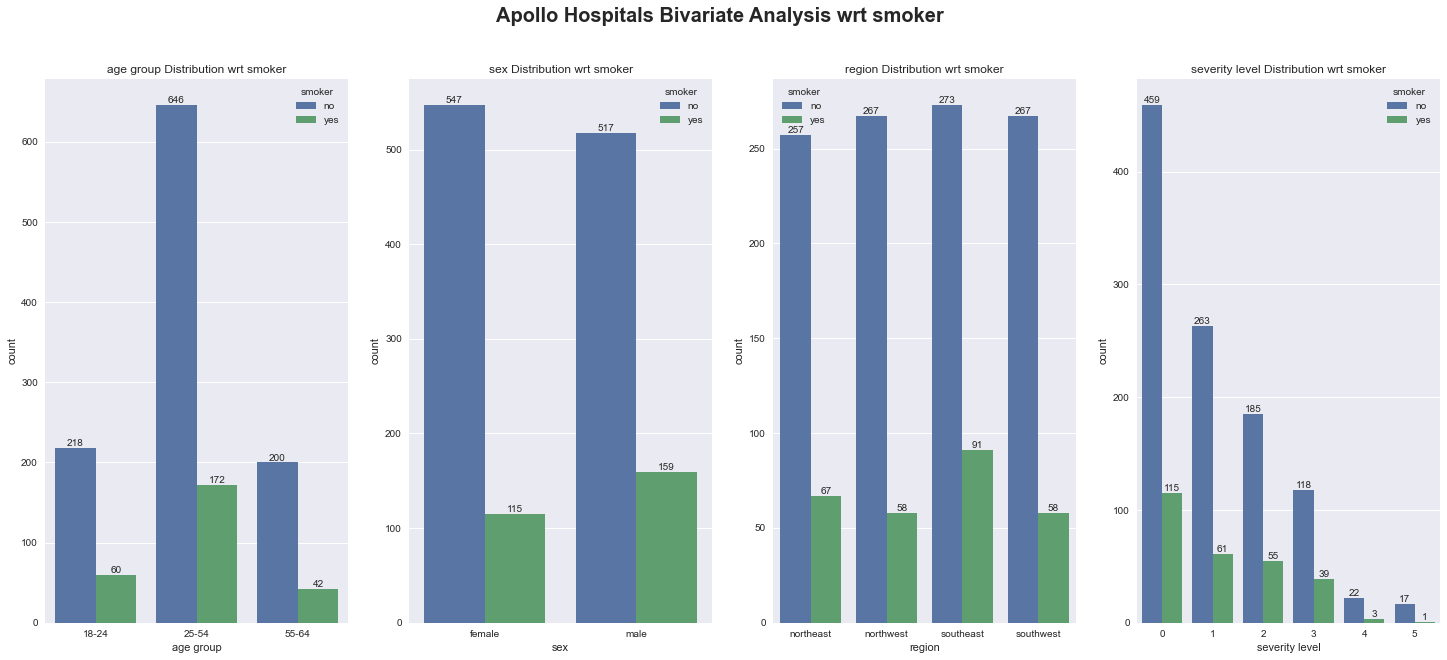

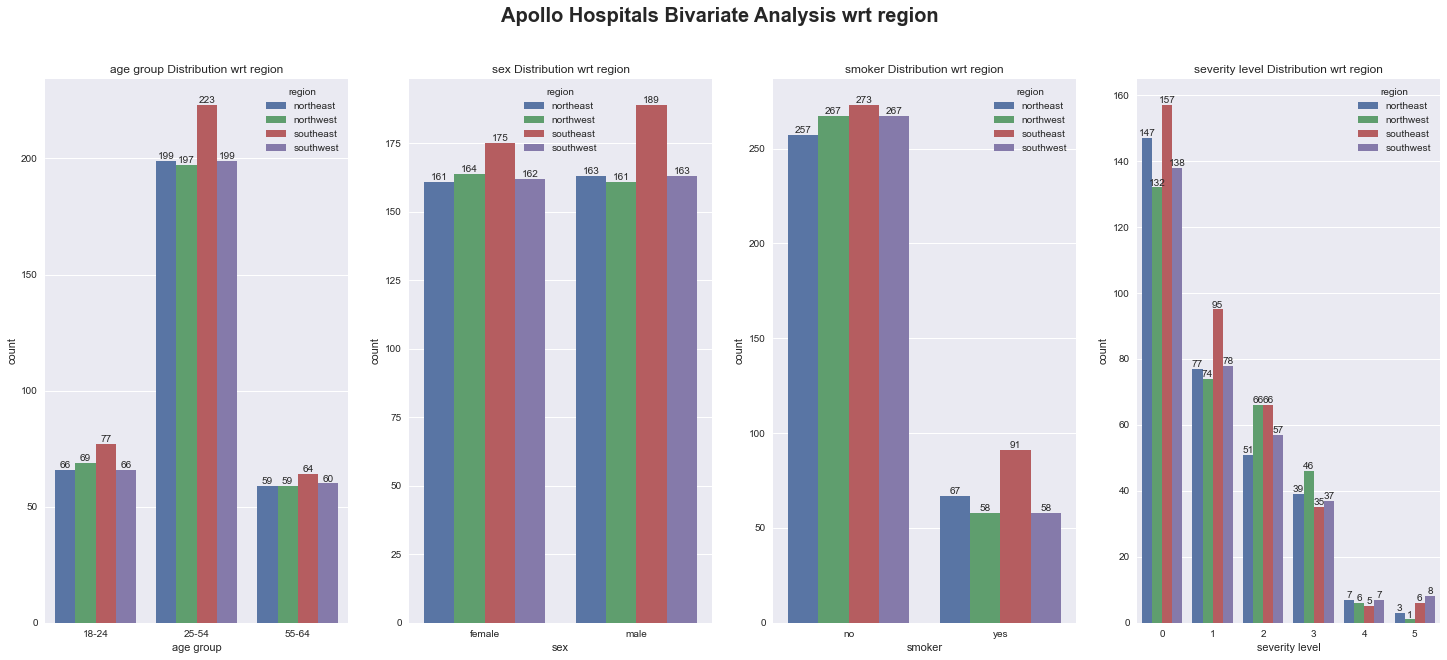

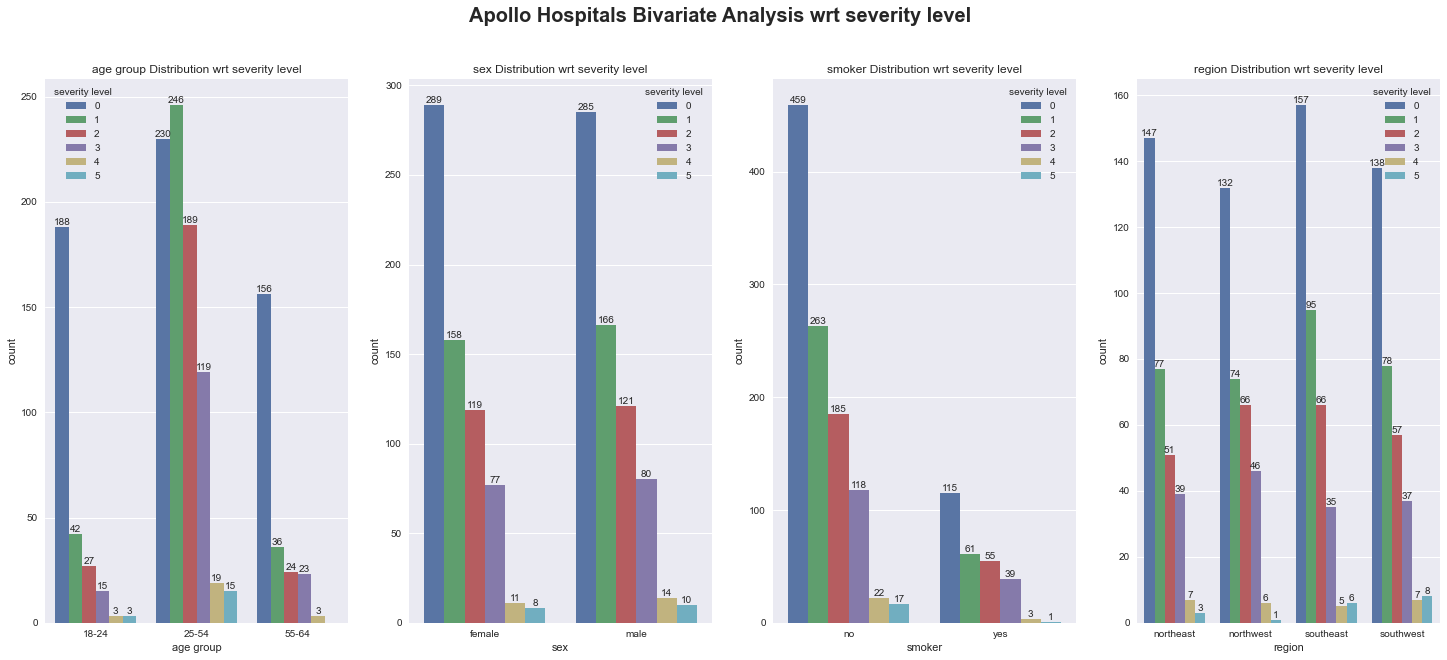

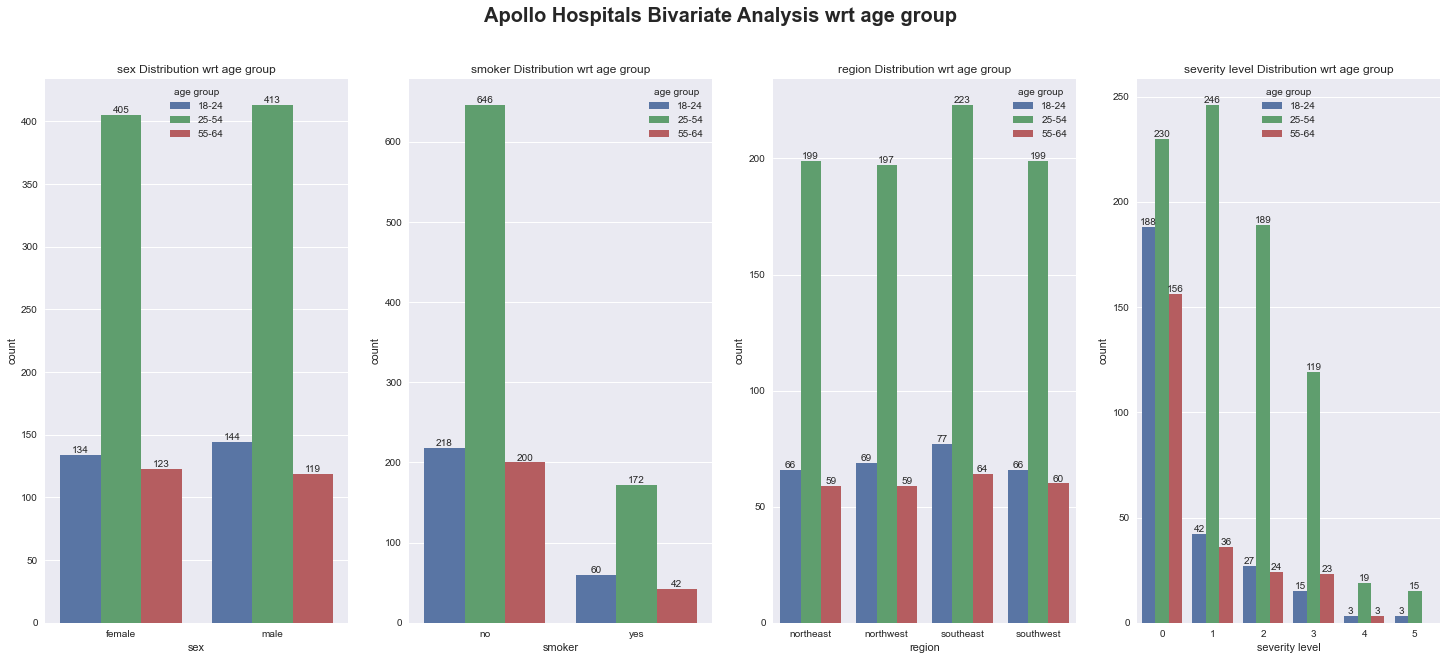

In [ ]:
for x in toCategory:
    bivariate_plot(x)

In [ ]:
def boxplots(xdata,datag,huedata, axs):
    graph = sns.boxplot(x = xdata, data= datag, y = huedata, dodge=False, ax=axs)
    title1 = "Boxplot Analysis for " + xdata + "&" + huedata
    graph.set_title(title1, fontsize = 12)
    data["severity level"]

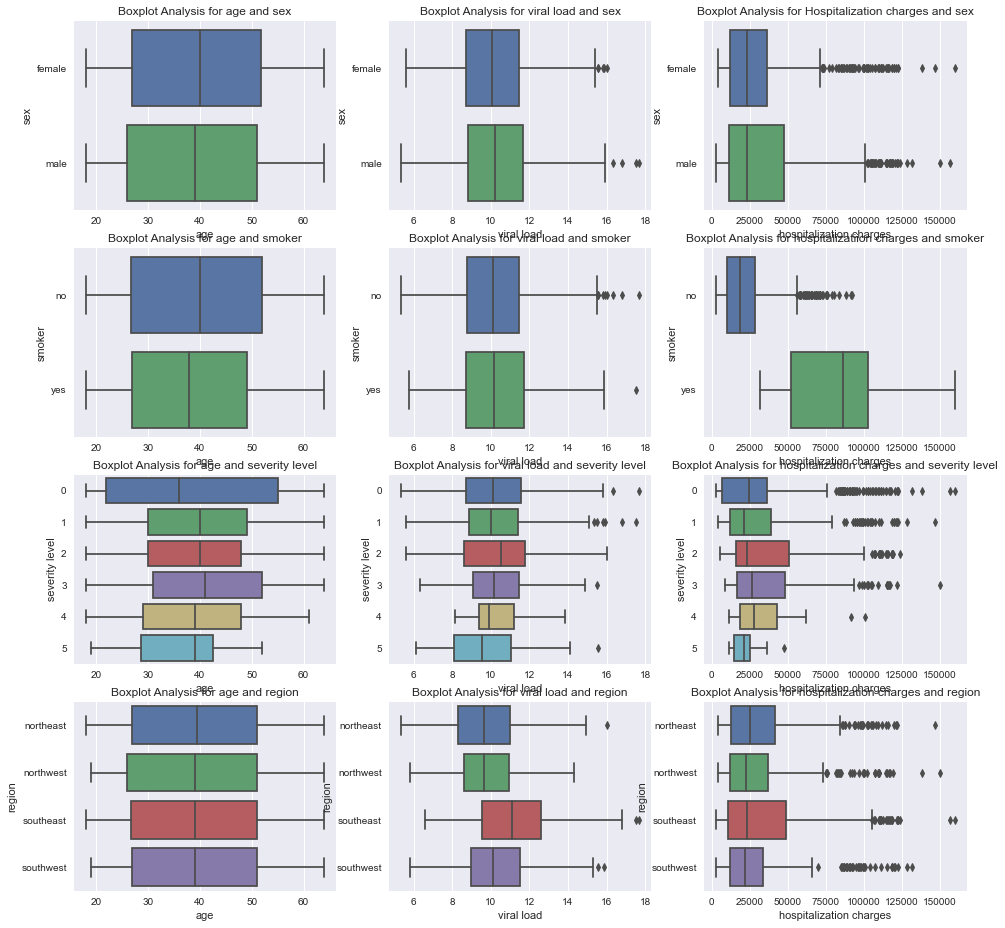

In [ ]:
fig, axs = plt.subplots(4, 3, figsize=(16, 16), sharey=False)
graph = sns.boxplot(x = "age", data= data, y = "sex", dodge=False, ax=axs[0][0])
title1 = "Boxplot Analysis for age and sex"
graph.set_title(title1, fontsize = 12)
graph = sns.boxplot(x = "viral load", data= data, y = "sex", dodge=False, ax=axs[0][1])
title1 = "Boxplot Analysis for viral load and sex"
graph.set_title(title1, fontsize = 12)
graph = sns.boxplot(x = "hospitalization charges", data= data, y = "sex", dodge=False, ax=axs[0][2])
title1 = "Boxplot Analysis for Hospitalization charges and sex"
graph.set_title(title1, fontsize = 12)
graph = sns.boxplot(x = "age", data= data, y = "smoker", dodge=False, ax=axs[1][0])
title1 = "Boxplot Analysis for age and smoker"
graph.set_title(title1, fontsize = 12)
graph = sns.boxplot(x = "viral load", data= data, y = "smoker", dodge=False, ax=axs[1][1])
title1 = "Boxplot Analysis for viral load and smoker"
graph.set_title(title1, fontsize = 12)
graph = sns.boxplot(x = "hospitalization charges", data= data, y = "smoker", dodge=False, ax=axs[1][2])
title1 = "Boxplot Analysis for hospitalizatiion charges and smoker"
graph.set_title(title1, fontsize = 12)
graph = sns.boxplot(x = "age", data= data, y = "severity level", dodge=False, ax=axs[2][0])
title1 = "Boxplot Analysis for age and severity level"
graph.set_title(title1, fontsize = 12)
graph = sns.boxplot(x = "viral load", data= data, y = "severity level", dodge=False, ax=axs[2][1])
title1 = "Boxplot Analysis for viral load and severity level"
graph.set_title(title1, fontsize = 12)
graph = sns.boxplot(x = "hospitalization charges", data= data, y = "severity level", dodge=False, ax=axs[2][2])
title1 = "Boxplot Analysis for hospitalization charges and severity level"
graph.set_title(title1, fontsize = 12)
graph = sns.boxplot(x = "age", data= data, y = "region", dodge=False, ax=axs[3][0])
title1 = "Boxplot Analysis for age and region"
graph.set_title(title1, fontsize = 12)
graph = sns.boxplot(x = "viral load", data= data, y = "region", dodge=False, ax=axs[3][1])
title1 = "Boxplot Analysis for viral load and region"
graph.set_title(title1, fontsize = 12)
graph = sns.boxplot(x = "hospitalization charges", data= data, y = "region", dodge=False, ax=axs[3][2])
title1 = "Boxplot Analysis for hospitalization charges and region"
graph.set_title(title1, fontsize = 12)
plt.show()

1.	Hospitalization charges for male patients is higher as compared to female patients.
2.	Hospitalization charges for people who smoke are higher as compared to the people who don’t smoke
3.	Hospitalization charges for severity level 2,3,1 and 0 are higher.
4.	Hospitalization charges for patients in southeast and northeast region are higher.


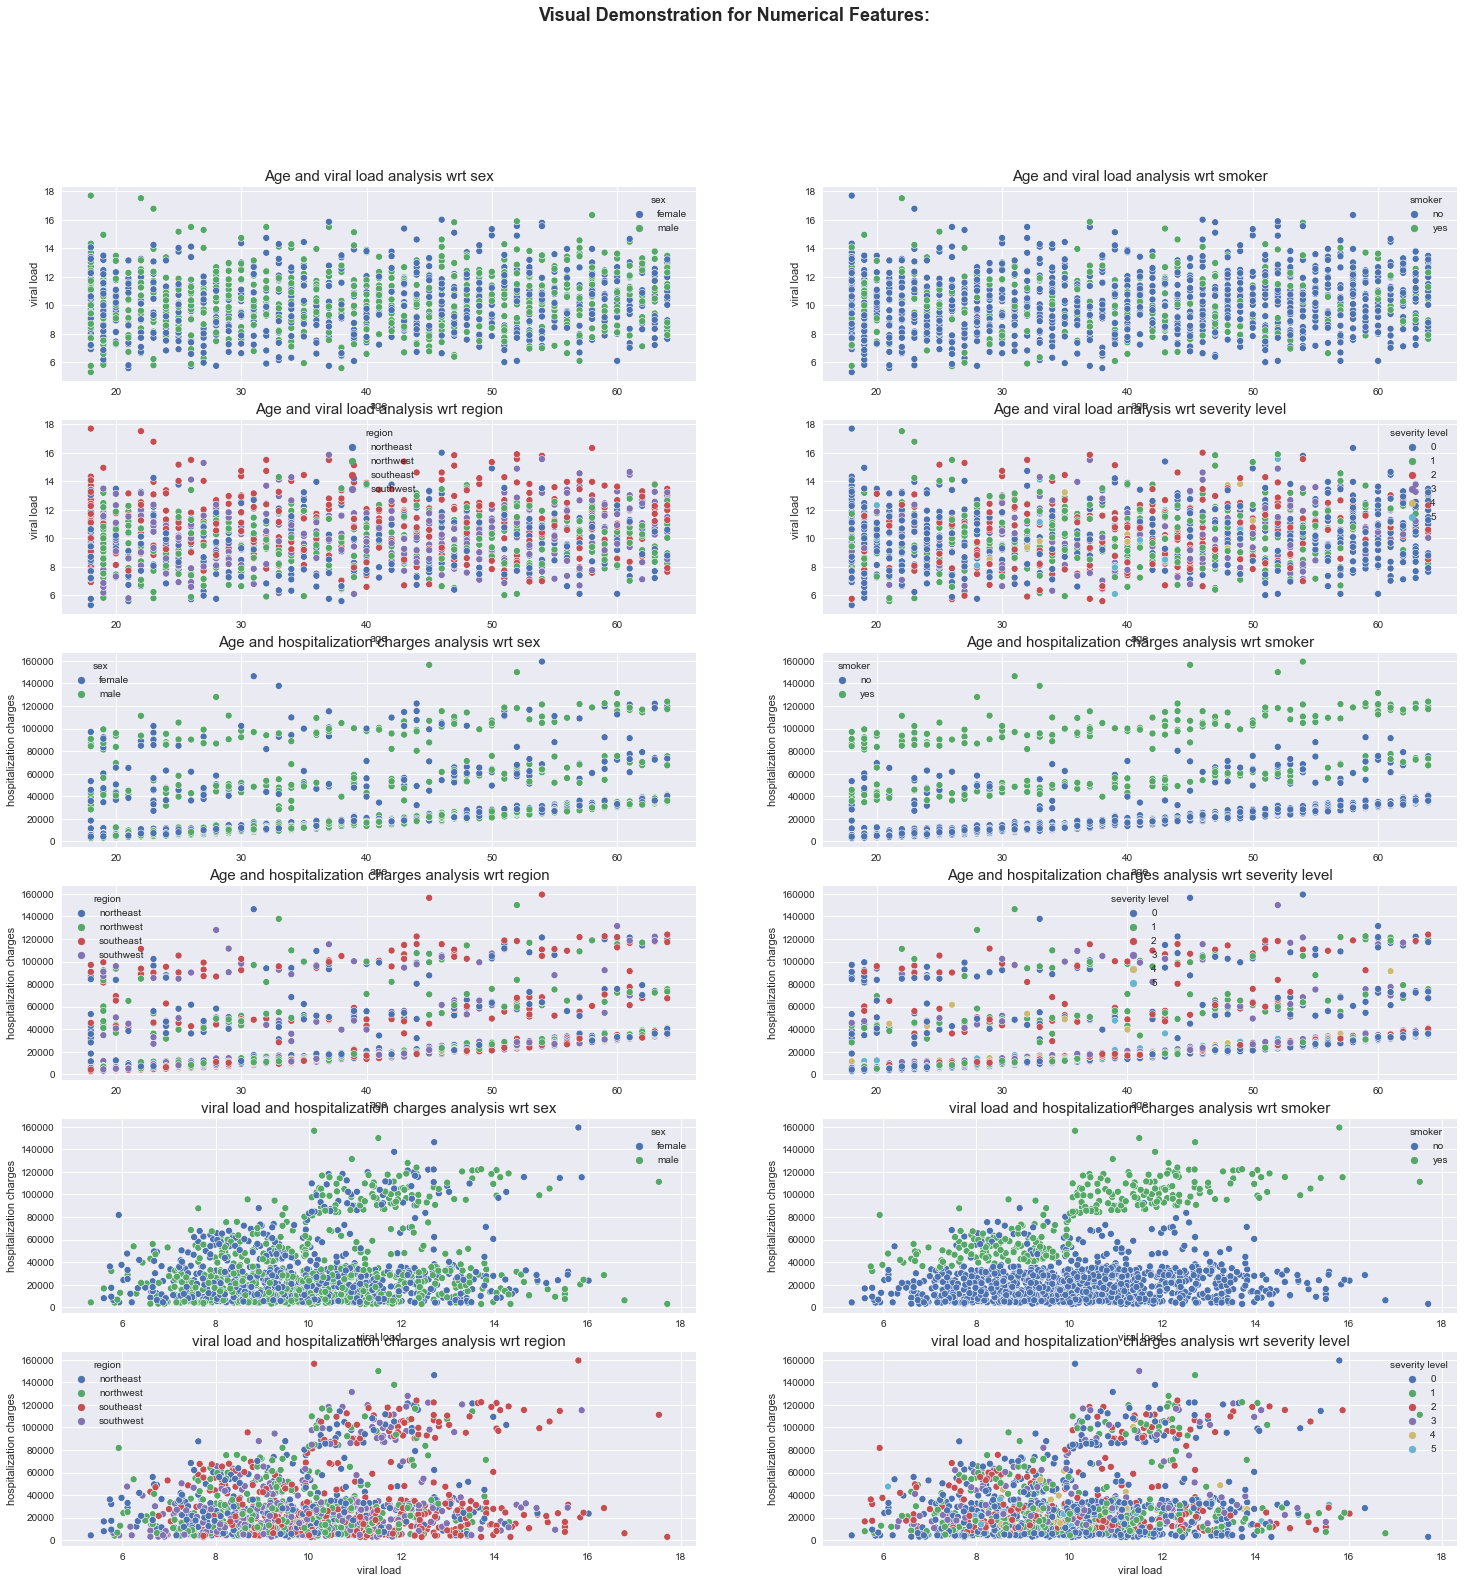

In [ ]:
fig, axs = plt.subplots(6, 2, figsize=(25, 25), sharey=False)
suptitle = "Visual Demonstration for Numerical Features: "
fig.suptitle(suptitle , fontsize=18, fontweight='bold')
graph = sns.scatterplot(x = data['age'], y= data['viral load'] ,hue = data['sex'] , ax = axs[0, 0])
title1 = "Age and viral load analysis wrt sex"
graph.set_title(title1, fontsize = 15)
graph = sns.scatterplot(x = data['age'], y= data['viral load'] ,hue = data['smoker'] , ax = axs[0, 1])
title1 = "Age and viral load analysis wrt smoker"
graph.set_title(title1, fontsize = 15)
graph = sns.scatterplot(x = data['age'], y= data['viral load'] ,hue = data['region'] , ax = axs[1, 0])
title1 = "Age and viral load analysis wrt region"
graph.set_title(title1, fontsize = 15)
graph = sns.scatterplot(x = data['age'], y= data['viral load'] ,hue = data['severity level'] , ax = axs[1, 1])
title1 = "Age and viral load analysis wrt severity level"
graph.set_title(title1, fontsize = 15)
graph = sns.scatterplot(x = data['age'], y= data['hospitalization charges'] ,hue = data['sex'] , ax = axs[2, 0])
title1 = "Age and hospitalization charges analysis wrt sex"
graph.set_title(title1, fontsize = 15)
graph = sns.scatterplot(x = data['age'], y= data['hospitalization charges'] ,hue = data['smoker'] , ax = axs[2, 1])
title1 = "Age and hospitalization charges analysis wrt smoker"
graph.set_title(title1, fontsize = 15)
graph = sns.scatterplot(x = data['age'], y= data['hospitalization charges'] ,hue = data['region'] , ax = axs[3, 0])
title1 = "Age and hospitalization charges analysis wrt region"
graph.set_title(title1, fontsize = 15)
graph = sns.scatterplot(x = data['age'], y= data['hospitalization charges'] ,hue = data['severity level'] , ax = axs[3, 1])
title1 = "Age and hospitalization charges analysis wrt severity level"
graph.set_title(title1, fontsize = 15)
graph = sns.scatterplot(x = data['viral load'], y= data['hospitalization charges'] ,hue = data['sex'] , ax = axs[4, 0])
title1 = "viral load and hospitalization charges analysis wrt sex"
graph.set_title(title1, fontsize = 15)
graph = sns.scatterplot(x = data['viral load'], y= data['hospitalization charges'] ,hue = data['smoker'] , ax = axs[4, 1])
title1 = "viral load and hospitalization charges analysis wrt smoker"
graph.set_title(title1, fontsize = 15)
graph = sns.scatterplot(x = data['viral load'], y= data['hospitalization charges'] ,hue = data['region'] , ax = axs[5, 0])
title1 = "viral load and hospitalization charges analysis wrt region"
graph.set_title(title1, fontsize = 15)
graph = sns.scatterplot(x = data['viral load'], y= data['hospitalization charges'] ,hue = data['severity level'] , ax = axs[5, 1])
title1 = "viral load and hospitalization charges analysis wrt severity level"
graph.set_title(title1, fontsize = 15)
plt.show()

Hospitalization charges are high for people who smoke in all the age groups.

People in age group 40 to 50 from southeast region has highest hospizatlization charges.
People above 40 age group with highest severity pays high.
Patients male and female both with viral load above 10  pays high.
Patients who smoke and has viral load above 10 pays high as compared to other patients


In [ ]:
def outlierAnalysis(x):
    Q3, Q1 = np.percentile(x, [75 ,25])
    IQR = Q3 - Q1
    maxExcludingOutlier = Q3 + 1.5 * IQR
    minExcludingOutlier = Q1 - 1.5 * IQR
    mean = round(x.mean(),2)
    median = round(x.median(),2)
    mode = round(x.mode(), 2)
    print("Q1: ", round(Q1, 2))
    print("Q3: ", round(Q3, 2))
    print("Mean: ", round(x.mean(),2))
    print("Median: ", round(x.median(),2))
    print("Mode: " , round(x.mode()[0], 2))
    print("IQR: " , round(IQR, 2))
    print("Maximum" +"Excluding Outlier: " , round(maxExcludingOutlier, 2))
    print("Minimum" + "Purchase Excluding Outlier: " , round(minExcludingOutlier,2))
    print('\033[1m' + "--------------------------------------------------------------------"+ '\033[0m')

In [ ]:
numericalFeatures = ['age', 'viral load', 'hospitalization charges']
for x in numericalFeatures:
    print('\033[1m' + "Outlier Analysis for "+x+ '\033[0m')
    outlierAnalysis(data[x])

Outlier Analysis for age
Q1:  27.0
Q3:  51.0
Mean:  39.21
Median:  39.0
Mode:  18
IQR:  24.0
MaximumExcluding Outlier:  87.0
MinimumPurchase Excluding Outlier:  -9.0
--------------------------------------------------------------------
Outlier Analysis for viral load
Q1:  8.76
Q3:  11.57
Mean:  10.22
Median:  10.13
Mode:  9.63
IQR:  2.81
MaximumExcluding Outlier:  15.78
MinimumPurchase Excluding Outlier:  4.55
--------------------------------------------------------------------
Outlier Analysis for hospitalization charges
Q1:  11851.0
Q3:  41599.5
Mean:  33176.06
Median:  23455.0
Mode:  4055
IQR:  29748.5
MaximumExcluding Outlier:  86222.25
MinimumPurchase Excluding Outlier:  -32771.75
--------------------------------------------------------------------


In [ ]:
def plotfor_continuousdata(x):
    fig, axs = plt.subplots(1, 2, figsize=(16, 6), squeeze=False)
    plt.suptitle(x+" Analysis", fontsize = 15)
    g1 = sns.histplot(data[x], kde = True, edgecolor='green', ax = axs[0, 0], bins = 20)
    g1.axvline(data[x].mean(), ls = '--', color = "red", lw = 2.5, label = "mean")
    g1.axvline(data[x].median(), ls = '--' ,color = 'blue', lw = 2.5, label = 'Median')
    g1.axvline(data[x].mode()[0], ls = '--', color = 'green', lw = 2.5, label = 'Mode')
    g1.legend()
    stats.probplot(data[x], dist="norm", plot=axs[0, 1])
    plt.tight_layout()
    plt.show()

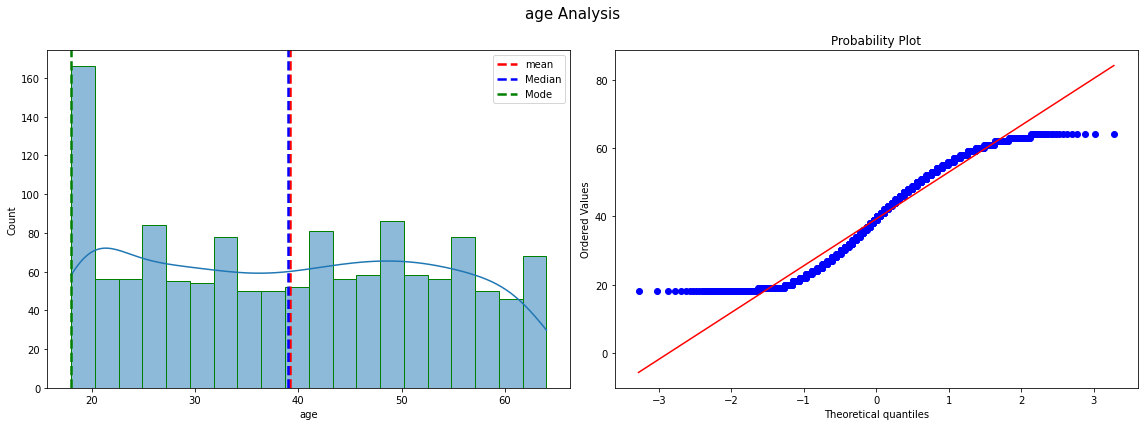

    ------------------------------------------------------------------------------------------------------------------------


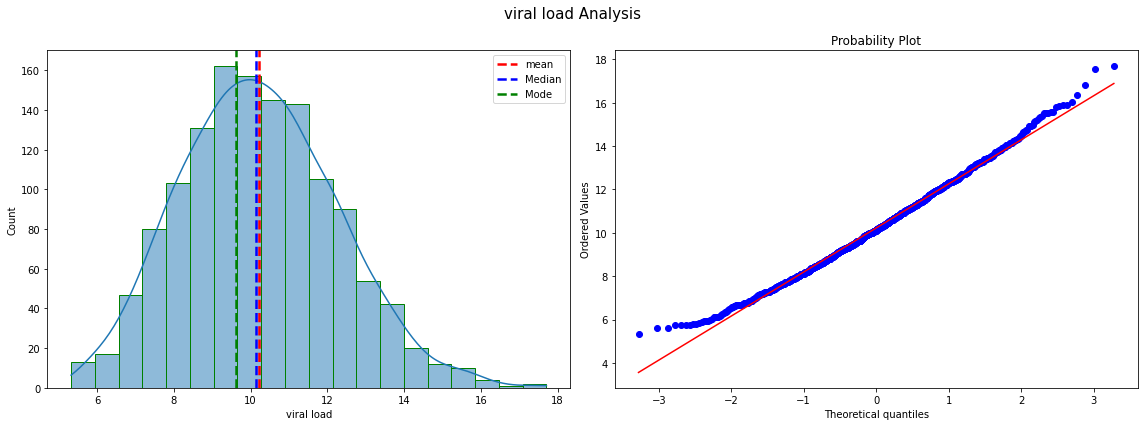

    ------------------------------------------------------------------------------------------------------------------------


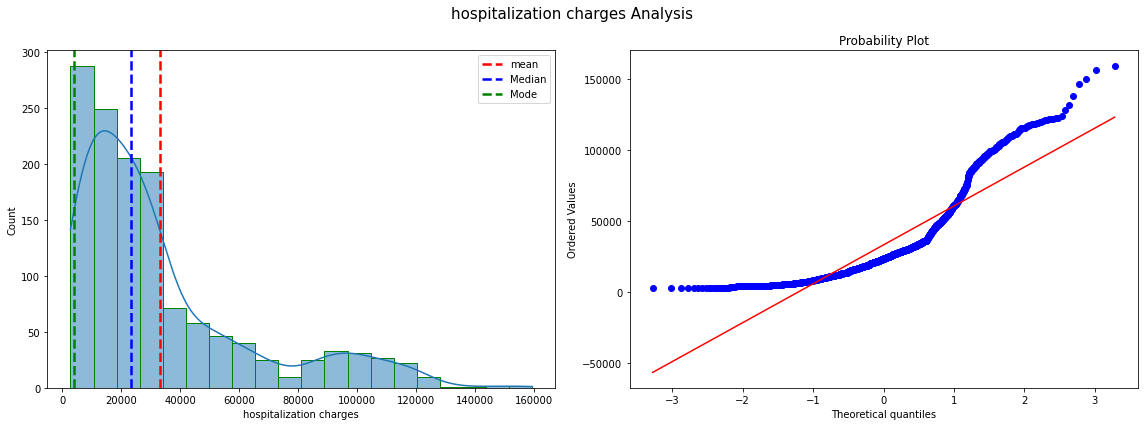

    ------------------------------------------------------------------------------------------------------------------------


In [ ]:
for x in numericalFeatures:
    plotfor_continuousdata(x)
    print('\033[1m' + "    ------------------------------------------------------------------------------------------------------------------------"+ '\033[0m')

### Prove (or disprove) that the hospitalization charges of people who do smoking are greater than those who don't?

In [ ]:
data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
data.smoker.value_counts(normalize=True)

no     0.795217
yes    0.204783
Name: smoker, dtype: float64

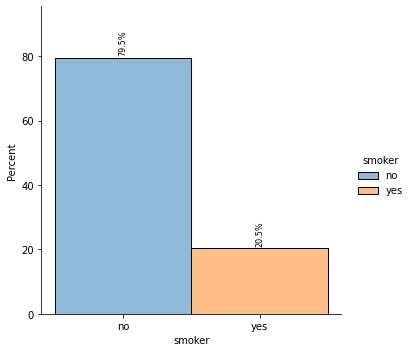

In [ ]:
graph = sns.displot(x = 'smoker', hue = 'smoker' ,data = data , stat = 'percent')
for ax in graph.axes.ravel():
    # add annotations
    for c in ax.containers:
        labels = [f'{w:0.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge', fontsize=8, rotation=90, padding=2)
    ax.margins(y=0.2)
plt.show()

From the given data we have around 80% people who don't smoke. while remaining 20% people are smokers

In [ ]:
peopleWhoSmoke = data[data['smoker'] == 'yes']

In [ ]:
peopleWhoDontSmoke = data[data['smoker'] == 'no']

In [ ]:
peopleWhoSmoke.shape

(274, 8)

In [ ]:
peopleWhoDontSmoke.shape

(1064, 8)

In [ ]:
print('\033[1m' + "Hospitalization Charges Description For People who smoke" + '\033[0m')
print(peopleWhoSmoke['hospitalization charges'].describe())
print('\033[1m' + "----------------------------------------------------------------------------------------------"+ '\033[0m')
print('\033[1m' + "Hospitalization Charges Description For People who dont smoke" + '\033[0m')
print(peopleWhoDontSmoke['hospitalization charges'].describe())

Hospitalization Charges Description For People who smoke
count       274.000000
mean      80125.572993
std       28853.891137
min       32074.000000
25%       52065.500000
50%       86141.000000
75%      102548.250000
max      159426.000000
Name: hospitalization charges, dtype: float64
----------------------------------------------------------------------------------------------
Hospitalization Charges Description For People who dont smoke
count     1064.000000
mean     21085.675752
std      14984.455500
min       2805.000000
25%       9966.250000
50%      18363.500000
75%      28407.250000
max      92277.000000
Name: hospitalization charges, dtype: float64


Hospitalization charges mean value for people who smoke is 80125 while for people who don't smoke is 21085.
Median values for both are 86141 and 18363 respectively. Both the datavalues have high standard deviation which implies data is more spread out

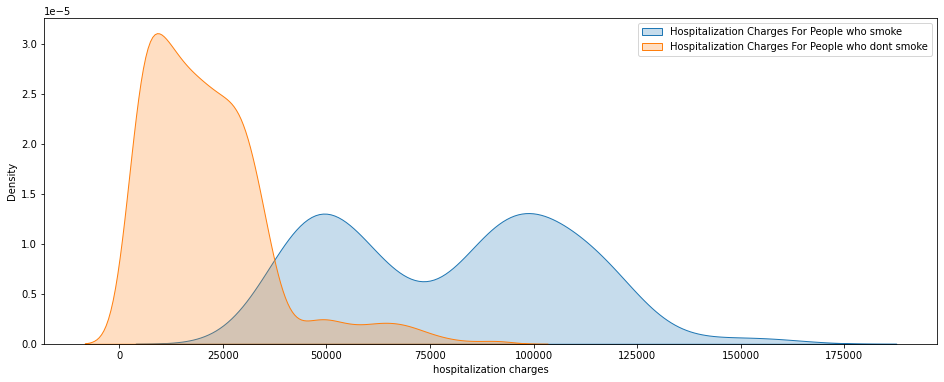

In [ ]:
plt.figure(figsize=(16,6))
sns.kdeplot(peopleWhoSmoke['hospitalization charges'], label = "Hospitalization Charges For People who smoke", fill= True)
sns.kdeplot(peopleWhoDontSmoke['hospitalization charges'], label = "Hospitalization Charges For People who dont smoke", fill = True)
plt.legend()
plt.show()

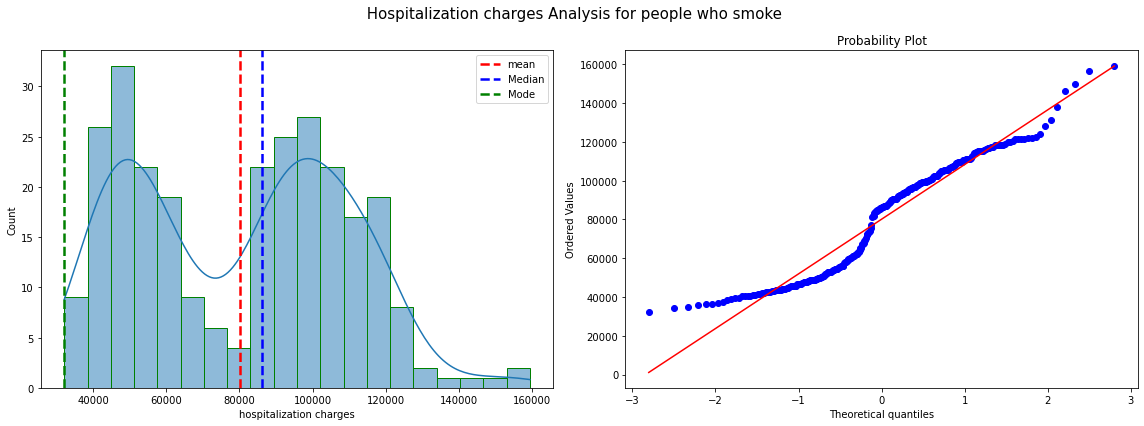

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), squeeze=False)
plt.suptitle(" Hospitalization charges Analysis for people who smoke", fontsize = 15)
g1 = sns.histplot(peopleWhoSmoke["hospitalization charges"], kde = True, edgecolor='green', ax = axs[0, 0], bins = 20)
g1.axvline(peopleWhoSmoke["hospitalization charges"].mean(), ls = '--', color = "red", lw = 2.5, label = "mean")
g1.axvline(peopleWhoSmoke["hospitalization charges"].median(), ls = '--' ,color = 'blue', lw = 2.5, label = 'Median')
g1.axvline(peopleWhoSmoke["hospitalization charges"].mode()[0], ls = '--', color = 'green', lw = 2.5, label = 'Mode')
g1.legend()
stats.probplot(peopleWhoSmoke["hospitalization charges"], dist="norm", plot=axs[0, 1])
plt.tight_layout()
plt.show()

For people who smoke there is no specific distribution but we can say that data is not normally distributed.

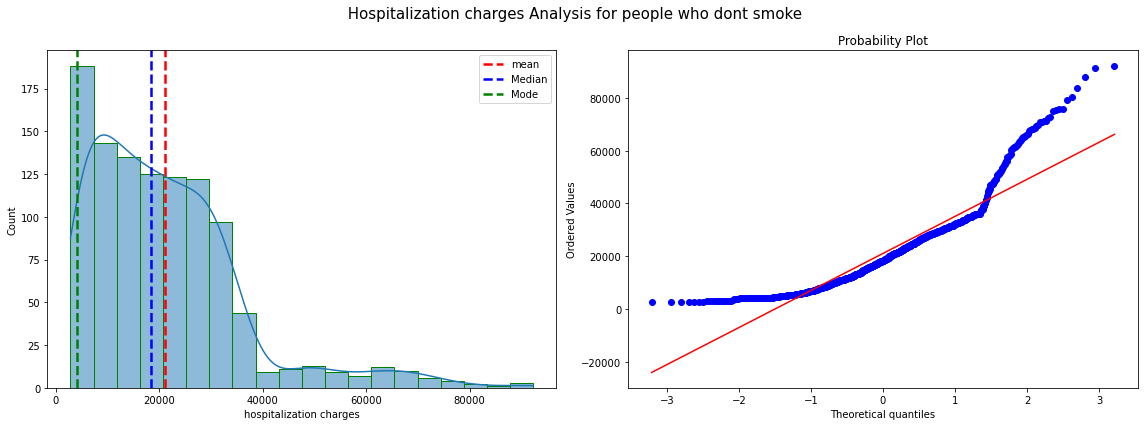

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), squeeze=False)
plt.suptitle(" Hospitalization charges Analysis for people who dont smoke", fontsize = 15)
g1 = sns.histplot(peopleWhoDontSmoke["hospitalization charges"], kde = True, edgecolor='green', ax = axs[0, 0], bins = 20)
g1.axvline(peopleWhoDontSmoke["hospitalization charges"].mean(), ls = '--', color = "red", lw = 2.5, label = "mean")
g1.axvline(peopleWhoDontSmoke["hospitalization charges"].median(), ls = '--' ,color = 'blue', lw = 2.5, label = 'Median')
g1.axvline(peopleWhoDontSmoke["hospitalization charges"].mode()[0], ls = '--', color = 'green', lw = 2.5, label = 'Mode')
g1.legend()
stats.probplot(peopleWhoDontSmoke["hospitalization charges"], dist="norm", plot=axs[0, 1])
plt.tight_layout()
plt.show()

For people who dont smoke we can see that data is not normally distributed. Here mean > median > mode, so we can say that data is right skewed or positively skewed

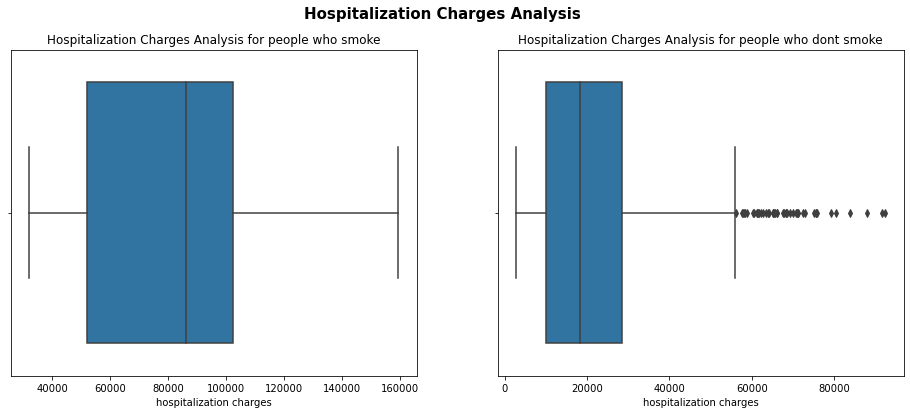

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=False)
suptitle = "Hospitalization Charges Analysis"
fig.suptitle(suptitle , fontsize=15, fontweight='bold')
graph = sns.boxplot(x = peopleWhoSmoke['hospitalization charges'], data= peopleWhoSmoke, dodge = False , ax = axs[0])
title1 = "Hospitalization Charges Analysis for people who smoke"
graph.set_title(title1, fontsize = 12)
graph2 = sns.boxplot(x = peopleWhoDontSmoke['hospitalization charges'], data = peopleWhoDontSmoke , dodge=False, ax = axs[1])
title1 = "Hospitalization Charges Analysis for people who dont smoke"
graph2.set_title(title1, fontsize = 12)
plt.show()

We can see so many outliers for hospitalization charges distribution for values greater than 56000 for people who don't smoke

In [ ]:
print('\033[1m' + "Outlier Analysis for Hospitalization Charges for People who smoke" + '\033[0m')
outlierAnalysis(peopleWhoSmoke['hospitalization charges'])
print('\033[1m' + "Outlier Analysis for Hospitalization Charges Description For People who dont smoke" + '\033[0m')
outlierAnalysis(peopleWhoDontSmoke['hospitalization charges'])

Outlier Analysis for Hospitalization Charges for People who smoke
Q1:  52065.5
Q3:  102548.25
Mean:  80125.57
Median:  86141.0
Mode:  32074
IQR:  50482.75
MaximumExcluding Outlier:  178272.38
MinimumPurchase Excluding Outlier:  -23658.62
--------------------------------------------------------------------
Outlier Analysis for Hospitalization Charges Description For People who dont smoke
Q1:  9966.25
Q3:  28407.25
Mean:  21085.68
Median:  18363.5
Mode:  4055
IQR:  18441.0
MaximumExcluding Outlier:  56068.75
MinimumPurchase Excluding Outlier:  -17695.25
--------------------------------------------------------------------


In [ ]:
HCSmoke = peopleWhoSmoke[(peopleWhoSmoke['hospitalization charges'] <= 178272.38) & (peopleWhoSmoke['hospitalization charges'] >= -23658.62)]
HCDontSmoke = peopleWhoDontSmoke[(peopleWhoDontSmoke['hospitalization charges'] <= 56068.75) & (peopleWhoDontSmoke['hospitalization charges'] >= -17695.25)]

In [ ]:
print(HCSmoke.shape)
print(HCDontSmoke.shape)

(274, 8)
(1018, 8)


After outlier treatment shape for data for people who don’t smoke has been reduced to 1018 from 1064

In [ ]:
print('\033[1m' + "Hospitalization Charges Description For People who smoke after outlier treatment" + '\033[0m')
print(HCSmoke['hospitalization charges'].describe())
print('\033[1m' + "----------------------------------------------------------------------------------------------"+ '\033[0m')
print('\033[1m' + "Hospitalization Charges Description For People who dont smoke after outlier treatment" + '\033[0m')
print(HCDontSmoke['hospitalization charges'].describe())

Hospitalization Charges Description For People who smoke after outlier treatment
count       274.000000
mean      80125.572993
std       28853.891137
min       32074.000000
25%       52065.500000
50%       86141.000000
75%      102548.250000
max      159426.000000
Name: hospitalization charges, dtype: float64
----------------------------------------------------------------------------------------------
Hospitalization Charges Description For People who dont smoke after outlier treatment
count     1018.000000
mean     18946.231827
std      11195.688564
min       2805.000000
25%       9656.500000
50%      17865.000000
75%      27262.500000
max      55989.000000
Name: hospitalization charges, dtype: float64


In [ ]:
HCDontSmoke = HCDontSmoke.sample(HCSmoke.shape[0])

In [ ]:
print('\033[1m' + "Hospitalization Charges Description For People who smoke after outlier treatment and for sample 274" + '\033[0m')
print(HCSmoke['hospitalization charges'].describe())
print('\033[1m' + "----------------------------------------------------------------------------------------------"+ '\033[0m')
print('\033[1m' + "Hospitalization Charges Description For People who dont smoke after outlier treatment and for sample 274" + '\033[0m')
print(HCDontSmoke['hospitalization charges'].describe())

Hospitalization Charges Description For People who smoke after outlier treatment and for sample 274
count       274.000000
mean      80125.572993
std       28853.891137
min       32074.000000
25%       52065.500000
50%       86141.000000
75%      102548.250000
max      159426.000000
Name: hospitalization charges, dtype: float64
----------------------------------------------------------------------------------------------
Hospitalization Charges Description For People who dont smoke after outlier treatment and for sample 274
count      274.000000
mean     19332.459854
std      10581.143333
min       2844.000000
25%      10366.250000
50%      18458.000000
75%      27727.000000
max      49373.000000
Name: hospitalization charges, dtype: float64


After outlier treatment and for sample size 274 Hospitalization charges mean for people who smoke is 80125 and for people who dont smoke is 19332.

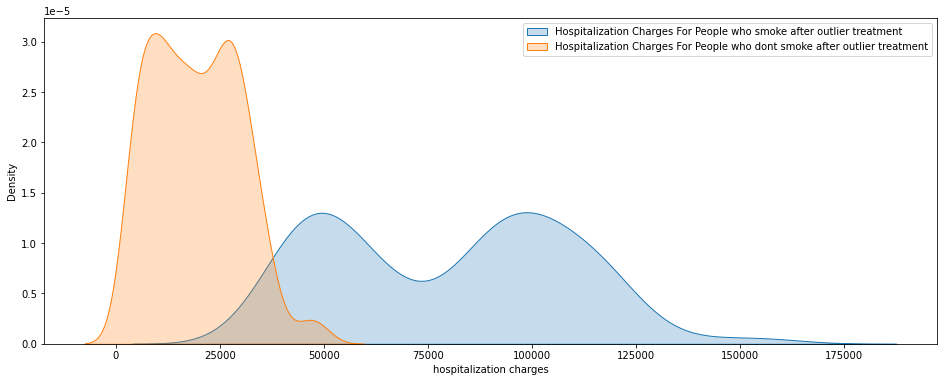

In [ ]:
plt.figure(figsize=(16,6))
sns.kdeplot(HCSmoke['hospitalization charges'], label = "Hospitalization Charges For People who smoke after outlier treatment", fill= True)
sns.kdeplot(HCDontSmoke['hospitalization charges'], label = "Hospitalization Charges For People who dont smoke after outlier treatment", fill = True)
plt.legend()
plt.show()

From above graphs we can clearly see that both the datasets for hosptalization charges for people who smoke and fpr people who dont smoke are not from same distribution

##### 2 sample KSTest to check distribution:

H0 (Null hypothesis): Distribution for samples for hospitalization charges for peopl who smoke and who dont smoke is same<br>
Ha (Alternate hypothesis) : Distribution for samples for hospitalization charges for peopl who smoke and who dont smoke is <br>different
alpha = 0.05

In [ ]:
stats.ks_2samp(HCSmoke['hospitalization charges'], HCDontSmoke['hospitalization charges'])

KstestResult(statistic=0.948905109489051, pvalue=1.3615773969856295e-136)

From the output we can see that the test statistic is 0.94 and the corresponding p-value is 1.3615773969856295e-136. Since the p-value is less than 0.05, we reject the null hypothesis. We have sufficient evidence to say that the two sample datasets do not come from the same distribution.

### T-test Right tailed

In [ ]:
print(np.var(HCDontSmoke['hospitalization charges'])/np.var(HCSmoke['hospitalization charges']))

0.1344796026009231


In [ ]:
print(1/(np.var(HCDontSmoke['hospitalization charges'])/np.var(HCSmoke['hospitalization charges'])))

7.436071944438775


variance ratio is greater than 4 so we can say it doesn't have equal variancee

In [ ]:
rng = np.random.default_rng()

In [ ]:
stats.ttest_ind(a=HCDontSmoke['hospitalization charges'], b=HCSmoke['hospitalization charges'], permutations=10000,random_state=rng,equal_var=False, alternative="greater")

Ttest_indResult(statistic=-32.743637992933266, pvalue=1.0)

Because the p-value of our test (1.0) is greater than alpha = 0.05, we fail to reject the null hypothesis of the test. We do not have sufficient evidence to say that Population mean for Hospitalization charges for people who dont smoke is greater than for people who smoket.<br>
Fail to reject the null hypotheisis<br>
So, we can say that Population mean for Hospitalization charges for people who dont smoke is less than for people who smoke

## Prove (or disprove) with statistical evidence that the viral load of females is different from that of males

In [ ]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

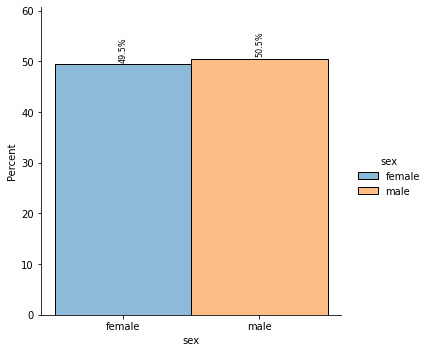

In [ ]:
graph = sns.displot(x = 'sex', hue = 'sex' ,data = data , stat = 'percent')
for ax in graph.axes.ravel():
    # add annotations
    for c in ax.containers:
        labels = [f'{w:0.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge', fontsize=8, rotation=90, padding=2)
    ax.margins(y=0.2)
plt.show()

For the given dataset we have nearly equal numbers of male and female patients 50- 50 percent

In [ ]:
malePatients = data[data['sex'] == 'male']
femalePatients = data[data['sex'] == 'female']

In [ ]:
print(malePatients.shape)
print(femalePatients.shape)

(676, 8)
(662, 8)


In [ ]:
print('\033[1m' + "Viral Load Description For Male Patients" + '\033[0m')
print(malePatients['viral load'].describe())
print('\033[1m' + "----------------------------------------------------------------------------------------------"+ '\033[0m')
print('\033[1m' + "Viral Load Description For Female Patients" + '\033[0m')
print(femalePatients['viral load'].describe())

Viral Load Description For Male Patients
count    676.000000
mean      10.314423
std        2.046889
min        5.320000
25%        8.800000
50%       10.230000
75%       11.662500
max       17.710000
Name: viral load, dtype: float64
----------------------------------------------------------------------------------------------
Viral Load Description For Female Patients
count    662.000000
mean      10.126073
std        2.015402
min        5.600000
25%        8.710000
50%       10.035000
75%       11.437500
max       16.020000
Name: viral load, dtype: float64


Here from the description the mean of viral load for male patients is 10.31 and for women it is 10.12.
And for median value it 12.23 and 10.03 for mal and female patients respectively

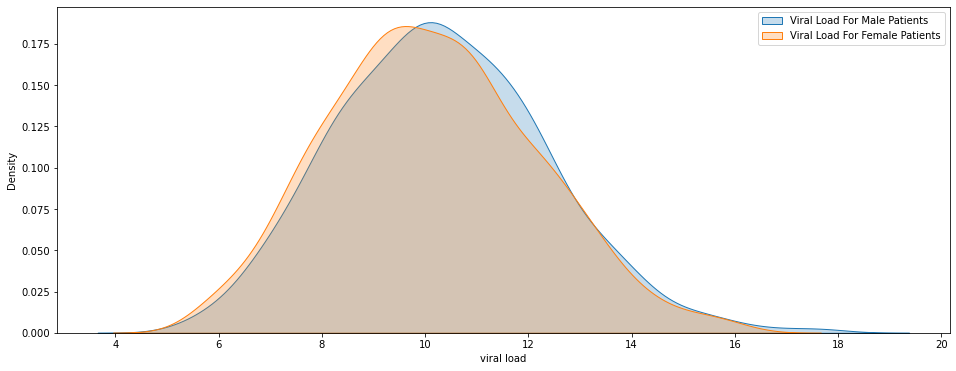

In [ ]:
plt.figure(figsize=(16,6))
sns.kdeplot(malePatients['viral load'], label = "Viral Load For Male Patients", fill= True)
sns.kdeplot(femalePatients['viral load'], label = "Viral Load For Female Patients", fill = True)
plt.legend()
plt.show()

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


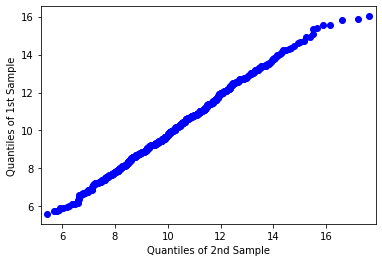

In [ ]:
pp_x = sm.ProbPlot(malePatients['viral load'])
pp_y = sm.ProbPlot(femalePatients['viral load'])
qqplot_2samples(pp_x, pp_y)
plt.show()

From QQ plot and kde plot it seems to be normal distribution

####  2sample ks test

H0 = 2 samples comes from same distibution<br>
Ha = 2 samples comes from different distribution

In [ ]:
from scipy.stats import ks_2samp
ks_2samp(malePatients['viral load'], femalePatients['viral load'])

KstestResult(statistic=0.05926991901893133, pvalue=0.1803102096437813)

From the output we can see that the test statistic is 0.05926 and the corresponding p-value is 0.18. Since the p-value is greater than .05, we accept the null hypothesis. We can say that the two sample datasets comes from the same distribution.

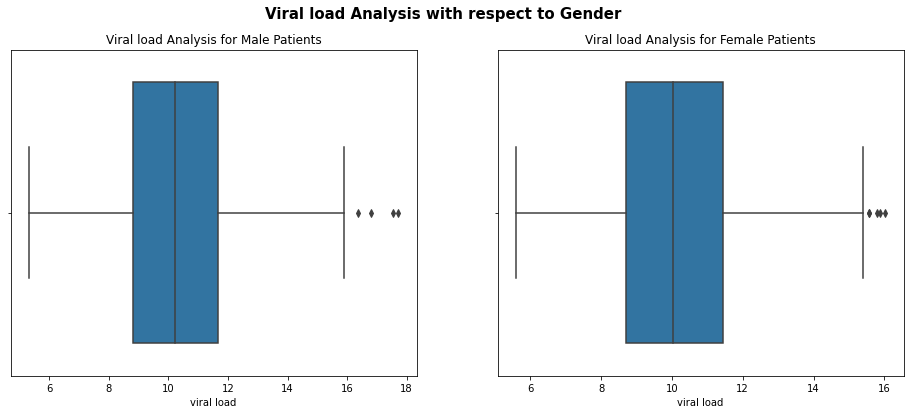

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=False)
suptitle = "Viral load Analysis with respect to Gender"
fig.suptitle(suptitle , fontsize=15, fontweight='bold')
graph = sns.boxplot(x = malePatients['viral load'], data= malePatients, dodge = False , ax = axs[0])
title1 = "Viral load Analysis for Male Patients"
graph.set_title(title1, fontsize = 12)
graph2 = sns.boxplot(x = femalePatients['viral load'], data = femalePatients , dodge=False, ax = axs[1])
title1 = "Viral load Analysis for Female Patients"
graph2.set_title(title1, fontsize = 12)
plt.show()

From the above boxplots there are outliers for both male viral load and female viral load data

In [ ]:
print('\033[1m' + "Outlier Analysis for Viral load Analysis for Male Patients" + '\033[0m')
outlierAnalysis(malePatients['viral load'])
print('\033[1m' + "Outlier Analysis for Viral load Analysis for Female Patients" + '\033[0m')
outlierAnalysis(femalePatients['viral load'])

Outlier Analysis for Viral load Analysis for Male Patients
Q1:  8.8
Q3:  11.66
Mean:  10.31
Median:  10.23
Mode:  10.77
IQR:  2.86
MaximumExcluding Outlier:  15.96
MinimumPurchase Excluding Outlier:  4.51
--------------------------------------------------------------------
Outlier Analysis for Viral load Analysis for Female Patients
Q1:  8.71
Q3:  11.44
Mean:  10.13
Median:  10.04
Mode:  9.63
IQR:  2.73
MaximumExcluding Outlier:  15.53
MinimumPurchase Excluding Outlier:  4.62
--------------------------------------------------------------------


In [ ]:
male = malePatients[(malePatients['viral load'] <= 15.96 ) & (malePatients['viral load'] >= 4.51)]
female = femalePatients[(femalePatients['viral load'] <= 15.53 ) & (femalePatients['viral load'] >= 4.62)]

In [ ]:
print(male.shape)
print(female.shape)

(672, 8)
(657, 8)


In [ ]:
print('\033[1m' + "Viral Load Description For Male Patients after Outlier treatment" + '\033[0m')
print(male['viral load'].describe())
print('\033[1m' + "----------------------------------------------------------------------------------------------"+ '\033[0m')
print('\033[1m' + "Viral Load Description For Female Patients after Outlier treatment" + '\033[0m')
print(female['viral load'].describe())

Viral Load Description For Male Patients after Outlier treatment
count    672.000000
mean      10.274062
std        1.984241
min        5.320000
25%        8.800000
50%       10.215000
75%       11.605000
max       15.910000
Name: viral load, dtype: float64
----------------------------------------------------------------------------------------------
Viral Load Description For Female Patients after Outlier treatment
count    657.000000
mean      10.083135
std        1.961661
min        5.600000
25%        8.680000
50%       10.010000
75%       11.400000
max       15.400000
Name: viral load, dtype: float64


In [ ]:
male = male.sample(female.shape[0])

In [ ]:
print('\033[1m' + "Viral Load Description For Male Patients after Outlier treatment for sample size 657" + '\033[0m')
print(male['viral load'].describe())
print('\033[1m' + "----------------------------------------------------------------------------------------------"+ '\033[0m')
print('\033[1m' + "Viral Load Description For Female Patients after Outlier treatment for sample size 657" + '\033[0m')
print(female['viral load'].describe())

Viral Load Description For Male Patients after Outlier treatment for sample size 657
count    657.000000
mean      10.268554
std        1.983113
min        5.320000
25%        8.800000
50%       10.200000
75%       11.600000
max       15.910000
Name: viral load, dtype: float64
----------------------------------------------------------------------------------------------
Viral Load Description For Female Patients after Outlier treatment for sample size 657
count    657.000000
mean      10.083135
std        1.961661
min        5.600000
25%        8.680000
50%       10.010000
75%       11.400000
max       15.400000
Name: viral load, dtype: float64


After outlier treatment mean value for viral load in male is 10.26and for female it is 10.08.
Median values are 10.2 and 10.01 resp

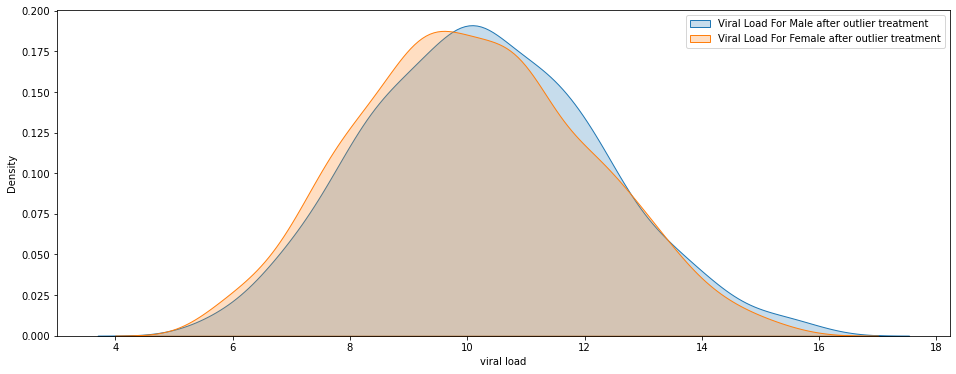

In [ ]:
plt.figure(figsize=(16,6))
sns.kdeplot(male['viral load'], label = "Viral Load For Male after outlier treatment", fill= True)
sns.kdeplot(female['viral load'], label = "Viral Load For Female after outlier treatment", fill = True)
plt.legend()
plt.show()

In [ ]:
print(np.var(male['viral load'])/np.var(female['viral load']))

1.021991218170508


### T-test Two tailed

In [ ]:
stats.ttest_ind(a=male['viral load'], b=female['viral load'],equal_var=True, alternative="two-sided")

Ttest_indResult(statistic=1.7038149320918632, pvalue=0.08865246606411473)

Because the p-value of our test (0.088) is greater than alpha = 0.05, we fail to reject the null hypothesis of the test.
So we can say that Population mean for Viral load for male and female patients is equal

## Is the proportion of smoking significantly different across different regions?

In [ ]:
table = pd.crosstab(data["smoker"],data["region"])
print('\033[1m' +'contingency_table'+ '\033[0m')
print('\033[1m' + "----------------------------------------------------------------------------------------------"+ '\033[0m')
table

contingency_table
----------------------------------------------------------------------------------------------


region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [ ]:
normalisedContigencyTable = pd.crosstab(data["smoker"],data["region"], normalize= True)
print('\033[1m' +'Normalized contingency table'+ '\033[0m')
print('\033[1m' + "----------------------------------------------------------------------------------------------"+ '\033[0m')
normalisedContigencyTable

Normalized contingency table
----------------------------------------------------------------------------------------------


region,northeast,northwest,southeast,southwest
smoker,,,,
no,0.192078,0.199552,0.204036,0.199552
yes,0.050075,0.043348,0.068012,0.043348


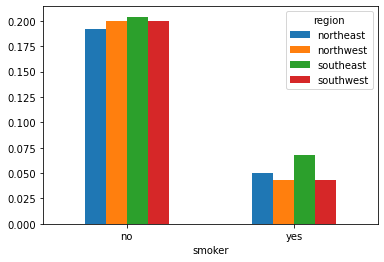

In [ ]:
barplot = normalisedContigencyTable.plot.bar(rot=0)

From the graphs and given data patients who doesnt smoke is nearly equal, and for Southeast area it seems smokers are on slightly higher side

### Chi Square Test

H0: (null hypothesis) The two variables are independent and means proportion is same across regions <br>
H1: (alternative hypothesis) The two variables are not independent and means proportion is different across regions<br>
aplha : 0.05

In [ ]:
stats.chi2_contingency(table)

(7.34347776140707,
 0.06171954839170547,
 3,
 array([[257.65022422, 258.44544096, 289.45889387, 258.44544096],
        [ 66.34977578,  66.55455904,  74.54110613,  66.55455904]]))

In [ ]:
stat, p, dof, expected = stats.chi2_contingency(table)

In [ ]:
print("Test Statistic: ", stat)
print("P value: ", p)
print("DOF: ", dof)
print("Expected Matrix: ", expected)

Test Statistic:  7.34347776140707
P value:  0.06171954839170547
DOF:  3
Expected Matrix:  [[257.65022422 258.44544096 289.45889387 258.44544096]
 [ 66.34977578  66.55455904  74.54110613  66.55455904]]


Here p value is greater than 0.05 so, we fail to reject the null hypothesis and can conclude that smoker and region features are independent of each other and means proportion is same across regions.

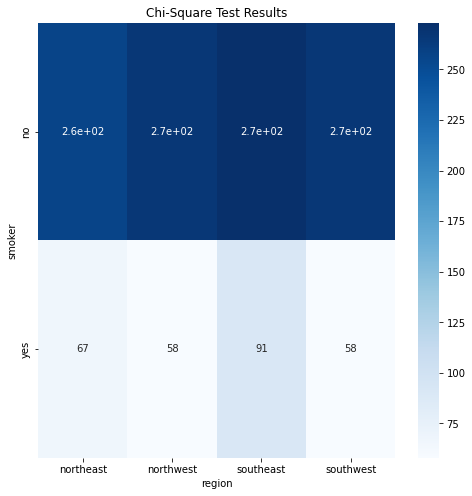

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.heatmap(table, annot=True, cmap='Blues')
plt.title('Chi-Square Test Results')
plt.show()

## Is the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same? Explain your answer with statistical evidence (One way Anova)

In [ ]:
womenData = data[data['sex'] == 'female']

In [ ]:
womenWithSeverity0 = womenData[womenData['severity level'] == 0]
womenWithSeverity1 = womenData[womenData['severity level'] == 1]
womenWithSeverity2 = womenData[womenData['severity level'] == 2]

In [ ]:
womenWithSeverity0.shape

(289, 8)

In [ ]:
womenWithSeverity1.shape

(158, 8)

In [ ]:
womenWithSeverity2.shape

(119, 8)

In [ ]:
print('\033[1m' + "Viral Load Description For Women with severity level 0: " + '\033[0m')
print(womenWithSeverity0['viral load'].describe())
print('\033[1m' + "----------------------------------------------------------------------------------------------"+ '\033[0m')
print('\033[1m' + "Viral Load Description For Women with severity level 1: " + '\033[0m')
print(womenWithSeverity1['viral load'].describe())
print('\033[1m' + "----------------------------------------------------------------------------------------------"+ '\033[0m')
print('\033[1m' + "Viral Load Description For Women with severity level 2: " + '\033[0m')
print(womenWithSeverity2['viral load'].describe())

Viral Load Description For Women with severity level 0: 
count    289.000000
mean      10.120727
std        1.989071
min        5.760000
25%        8.730000
50%        9.980000
75%       11.530000
max       15.800000
Name: viral load, dtype: float64
----------------------------------------------------------------------------------------------
Viral Load Description For Women with severity level 1: 
count    158.000000
mean      10.017468
std        1.929065
min        5.600000
25%        8.657500
50%        9.855000
75%       11.315000
max       15.360000
Name: viral load, dtype: float64
----------------------------------------------------------------------------------------------
Viral Load Description For Women with severity level 2: 
count    119.000000
mean      10.216807
std        2.209687
min        5.730000
25%        8.590000
50%       10.430000
75%       11.585000
max       16.020000
Name: viral load, dtype: float64


For women with severity 0 mean value for viral load is 10.12, for severity 1 it is 10.01 and for sevrity 2 it is 10.21 which is nearly equal

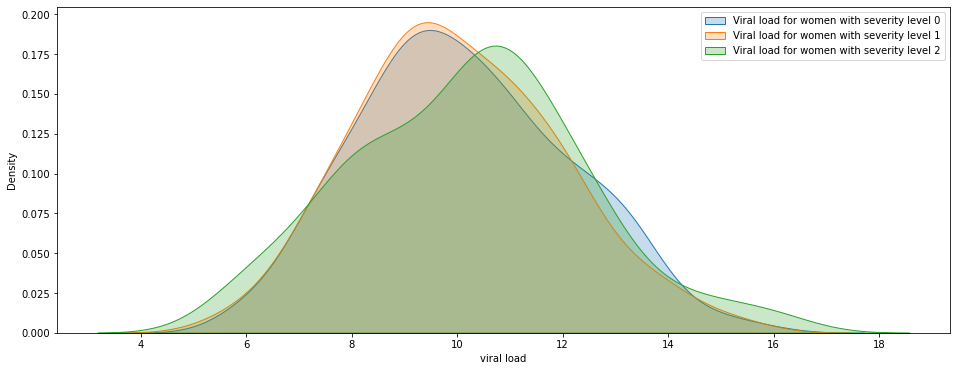

In [ ]:
plt.figure(figsize=(16,6))
sns.kdeplot(womenWithSeverity0['viral load'], label = "Viral load for women with severity level 0", fill= True)
sns.kdeplot(womenWithSeverity1['viral load'], label = "Viral load for women with severity level 1", fill= True)
sns.kdeplot(womenWithSeverity2['viral load'], label = "Viral load for women with severity level 2", fill= True)
plt.legend()
plt.show()

From the graphical representation we can see that viral load for women with severity 0 and 1 are overlapping and overlapped with 2 as well but there are some differences

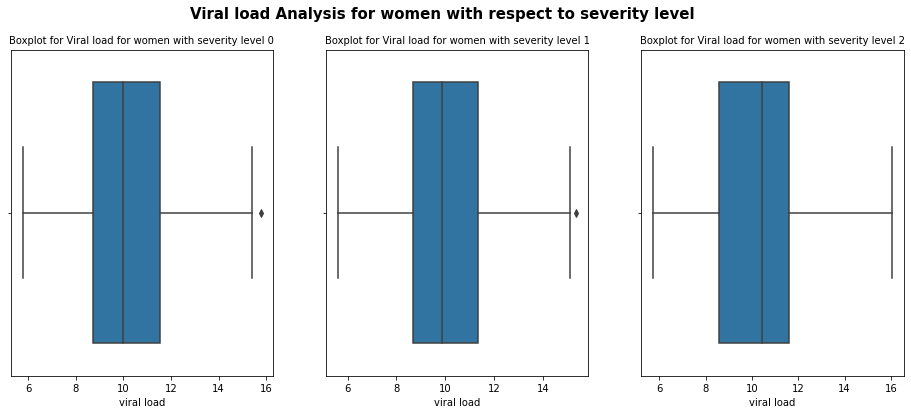

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6), sharey=False)
suptitle = "Viral load Analysis for women with respect to severity level"
fig.suptitle(suptitle , fontsize=15, fontweight='bold')
graph = sns.boxplot(x = womenWithSeverity0['viral load'], data= malePatients, dodge = False , ax = axs[0])
title1 = "Boxplot for Viral load for women with severity level 0"
graph.set_title(title1, fontsize = 10)
graph2 = sns.boxplot(x = womenWithSeverity1['viral load'], data= malePatients, dodge = False , ax = axs[1])
title1 = "Boxplot for Viral load for women with severity level 1"
graph2.set_title(title1, fontsize = 10)
graph3 = sns.boxplot(x = womenWithSeverity2['viral load'], data= malePatients, dodge = False , ax = axs[2])
title1 = "Boxplot for Viral load for women with severity level 2"
graph3.set_title(title1, fontsize = 10)
plt.show()

In [ ]:
# Outlier treatment

def OutlierTreatment(val, col):
    Q3, Q1 = np.percentile(val[col], [75 ,25])
    IQR = Q3 - Q1
    maxExcludingOutlier = Q3 + 1.5 * IQR
    minExcludingOutlier = Q1 - 1.5 * IQR
    val = val[(val[col] <= maxExcludingOutlier ) & (val[col] >= minExcludingOutlier)]
    return val

In [ ]:
print('\033[1m' + "Viral Load Outlier Analysis For Women with severity level 0: " + '\033[0m')
outlierAnalysis(womenWithSeverity0['viral load'])
print('\033[1m' + "Viral Load Outlier Analysis For Women with severity level 1: " + '\033[0m')
outlierAnalysis(womenWithSeverity1['viral load'])
print('\033[1m' + "Viral Load Outlier Analysis For Women with severity level 2: " + '\033[0m')
outlierAnalysis(womenWithSeverity2['viral load'])

Viral Load Outlier Analysis For Women with severity level 0: 
Q1:  8.73
Q3:  11.53
Mean:  10.12
Median:  9.98
Mode:  8.36
IQR:  2.8
MaximumExcluding Outlier:  15.73
MinimumPurchase Excluding Outlier:  4.53
--------------------------------------------------------------------
Viral Load Outlier Analysis For Women with severity level 1: 
Q1:  8.66
Q3:  11.32
Mean:  10.02
Median:  9.86
Mode:  10.8
IQR:  2.66
MaximumExcluding Outlier:  15.3
MinimumPurchase Excluding Outlier:  4.67
--------------------------------------------------------------------
Viral Load Outlier Analysis For Women with severity level 2: 
Q1:  8.59
Q3:  11.58
Mean:  10.22
Median:  10.43
Mode:  10.77
IQR:  3.0
MaximumExcluding Outlier:  16.08
MinimumPurchase Excluding Outlier:  4.1
--------------------------------------------------------------------


In [ ]:
OutlierTreatment(womenWithSeverity0, "viral load")
womenWithSeverity0.shape

(289, 8)

In [ ]:
OutlierTreatment(womenWithSeverity1, "viral load")
womenWithSeverity1.shape

(158, 8)

In [ ]:
OutlierTreatment(womenWithSeverity2, "viral load")
womenWithSeverity2.shape

(119, 8)

In [ ]:
sample_size = min(womenWithSeverity0.shape[0], womenWithSeverity1.shape[0], womenWithSeverity2.shape[0])
sample_size

119

In [ ]:
group1 = womenWithSeverity0.sample(sample_size)['viral load']
group2 = womenWithSeverity1.sample(sample_size)['viral load']
group3 = womenWithSeverity2.sample(sample_size)['viral load']

In [ ]:
print('\033[1m' + "Viral Load Description For Women Patients with severity 0 after Outlier treatment for sample size "+str(sample_size)+ '\033[0m')
print(group1.describe())
print('\033[1m' + "----------------------------------------------------------------------------------------------"+ '\033[0m')
print('\033[1m' + "Viral Load Description For Women Patients with severity 1 after Outlier treatment for sample size " + str(sample_size) + '\033[0m')
print(group2.describe())
print('\033[1m' + "----------------------------------------------------------------------------------------------"+ '\033[0m')
print('\033[1m' + "Viral Load Description For Women Patients with severity 2 after Outlier treatment for sample size " + str(sample_size) + '\033[0m')
print(group3.describe())

Viral Load Description For Women Patients with severity 0 after Outlier treatment for sample size 119
count    119.000000
mean      10.096471
std        1.953191
min        6.020000
25%        8.645000
50%        9.980000
75%       11.415000
max       15.400000
Name: viral load, dtype: float64
----------------------------------------------------------------------------------------------
Viral Load Description For Women Patients with severity 1 after Outlier treatment for sample size 119
count    119.000000
mean      10.104706
std        1.993502
min        5.600000
25%        8.890000
50%        9.970000
75%       11.350000
max       15.360000
Name: viral load, dtype: float64
----------------------------------------------------------------------------------------------
Viral Load Description For Women Patients with severity 2 after Outlier treatment for sample size 119
count    119.000000
mean      10.216807
std        2.209687
min        5.730000
25%        8.590000
50%       10.43000

Leven's test

In [ ]:
#Levene's test centered at the mean
stats.levene(group1, group2, group3, center='mean')

LeveneResult(statistic=0.6954444132786158, pvalue=0.49953292934762095)

In [ ]:
#Levene's test centered at the median
stats.levene(group1, group2, group3, center='median')

LeveneResult(statistic=0.6754411407728645, pvalue=0.5095865079051121)

In both methods, the p-value is not less than .05. This means in both cases we would fail to reject the null hypothesis. This means we do not have sufficient evidence to say that the variance in all the three groups Viral load for women with severoty 0, 1 and 2 is significantly different.

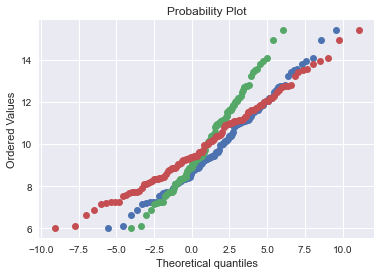

In [ ]:
plt.style.use('seaborn')
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
stats.probplot(group1, dist=stats.norm, sparams=(2,3), plot=plt, fit=False)
stats.probplot(group1, dist=stats.norm, sparams=(1,2), plot=plt, fit=False)
stats.probplot(group1, dist=stats.norm, sparams=(1,4), plot=plt, fit=False)

# Remove the regression lines
# ax.get_lines()[0].remove()
# ax.get_lines()[1].remove()
# # ax.get_lines()[2].remove()

# Change colour of scatter
ax.get_lines()[0].set_markerfacecolor('C0')
ax.get_lines()[1].set_markerfacecolor('C1')
ax.get_lines()[2].set_markerfacecolor('C2')

# Add on y=x line
# ax.plot([0, 1], [0, 1], c='C3')

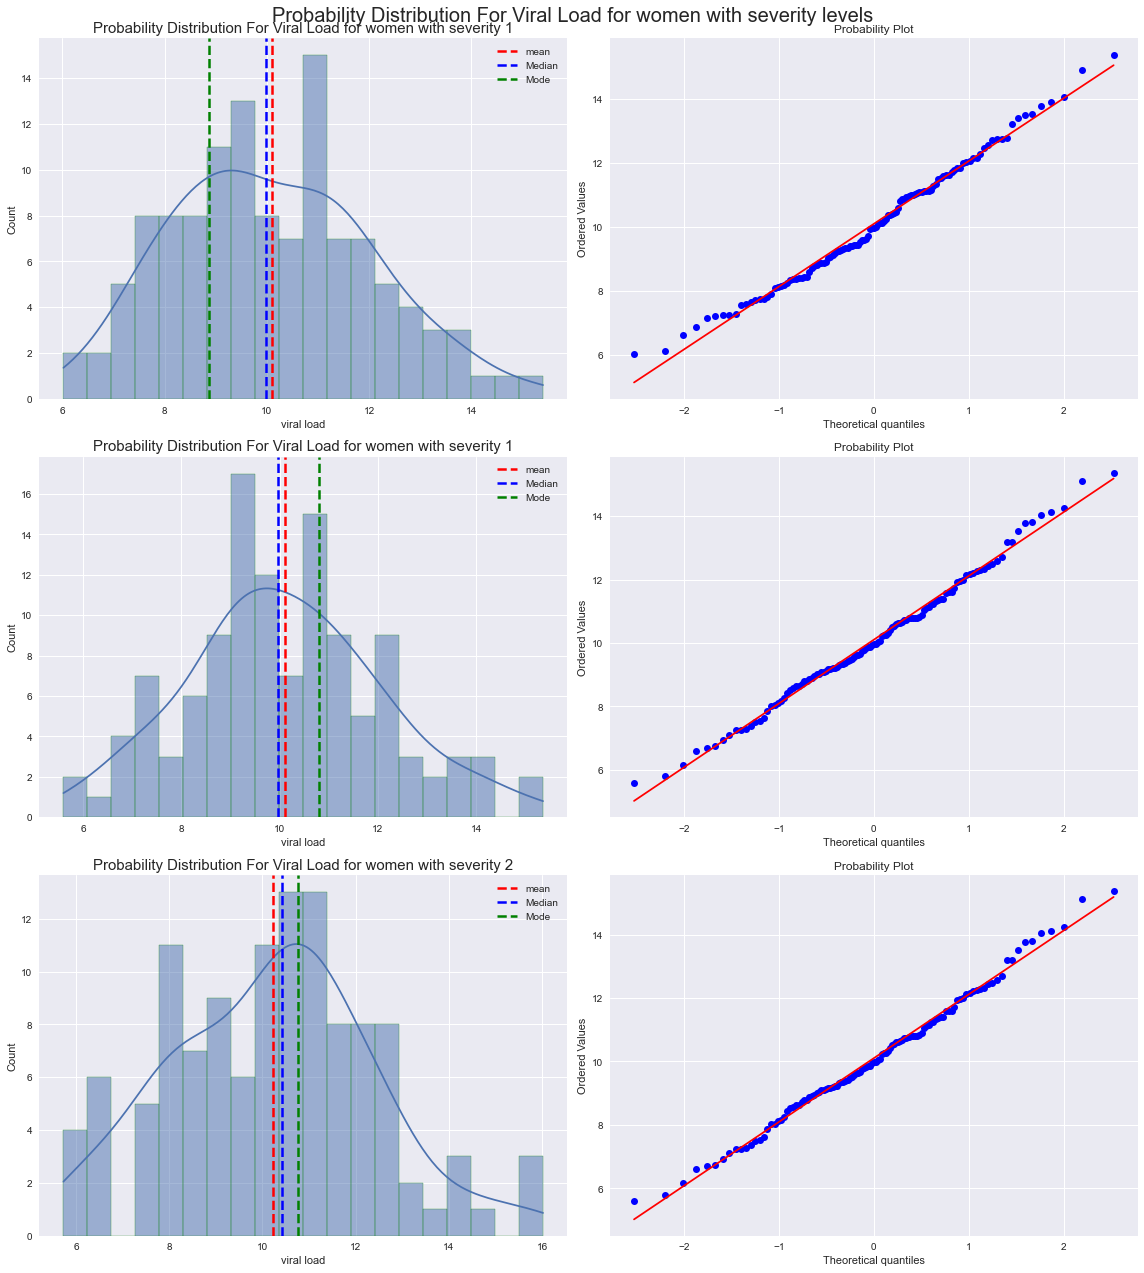

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(16, 18), squeeze=False)
plt.suptitle("Probability Distribution For Viral Load for women with severity levels", fontsize = 20)
g1 = sns.histplot(group1, kde = True, edgecolor='green', ax = axs[0, 0], bins = 20)
g1.axvline(group1.mean(), ls = '--', color = "red", lw = 2.5, label = "mean")
g1.axvline(group1.median(), ls = '--' ,color = 'blue', lw = 2.5, label = 'Median')
g1.axvline(group1.mode()[0], ls = '--', color = 'green', lw = 2.5, label = 'Mode')
g1.legend()
stats.probplot(group1, dist="norm", plot=axs[0, 1])
g1.set_title("Probability Distribution For Viral Load for women with severity 1", fontsize = 15)
g1 = sns.histplot(group2, kde = True, edgecolor='green', ax = axs[1, 0], bins = 20)
g1.axvline(group2.mean(), ls = '--', color = "red", lw = 2.5, label = "mean")
g1.axvline(group2.median(), ls = '--' ,color = 'blue', lw = 2.5, label = 'Median')
g1.axvline(group2.mode()[0], ls = '--', color = 'green', lw = 2.5, label = 'Mode')
g1.legend()
stats.probplot(group2, dist="norm", plot=axs[1, 1])
g1.set_title("Probability Distribution For Viral Load for women with severity 1", fontsize = 15)
g1 = sns.histplot(group3, kde = True, edgecolor='green', ax = axs[2, 0], bins = 20)
g1.axvline(group3.mean(), ls = '--', color = "red", lw = 2.5, label = "mean")
g1.axvline(group3.median(), ls = '--' ,color = 'blue', lw = 2.5, label = 'Median')
g1.axvline(group3.mode()[0], ls = '--', color = 'green', lw = 2.5, label = 'Mode')
g1.legend()
stats.probplot(group2, dist="norm", plot=axs[2, 1])
g1.set_title("Probability Distribution For Viral Load for women with severity 2", fontsize = 15)
plt.tight_layout()
plt.show()

From probability plots it is observed that all the distributions for severity 0, 1 and 2 are normal

### 2sample ks test
H0 = 2 samples(women with severity 0 and 1) comes from same distribution<br>
Ha = 2 samples(women with severity 0 and 1) comes from different distribution

In [ ]:
stats.ks_2samp(group1, group2)

KstestResult(statistic=0.07563025210084033, pvalue=0.8874775114534338)

H0 = 2 samples(women with severity 1 and 2) comes from same distribution<br>
Ha = 2 samples(women with severity 1 and 2) comes from different distribution

In [ ]:
stats.ks_2samp(group3, group2)

KstestResult(statistic=0.08403361344537816, pvalue=0.7970555193701596)

Here pvalue is greater than our alpha value 0.05. so we can say that  2 samples(women with severity 1 and 2) comes from same distribution

### One way anova
H0 (null hypothesis): μ1 = μ2 = μ3 (all the population means for women patients with severity 0, severity 1and severity 2
are equal)<br>
H1 (null hypothesis): at least one population mean is different from the rest<br>
alpha = 0.05

In [ ]:
from scipy.stats import f_oneway
#perform one-way ANOVA
f_oneway(group1, group2, group3)

F_onewayResult(statistic=0.12731929874870748, pvalue=0.8804927992001772)

The F test statistic is 0.127 and the corresponding p-value is 0.88. Since the p-value is not less than .05, we fail to reject the null hypothesis.

This means we do not have sufficient evidence to say that there is a difference in population mean for women with severity 0 , 1 and 2

Business Insights:

1.	Hospitalization charges for male patients is higher as compared to female patients.
2.	Hospitalization charges for people who smoke are higher as compared to the people who don’t smoke
3.	Hospitalization charges for severity level 2,3,1 and 0 are higher.
4.	Hospitalization charges for patients in southeast and northeast region are higher.
5.	Hospitalization charges are high for people who smoke in all the age groups.
6.	People in age group 40 to 50 from southeast region has highest hospitalization charges.
7.	People above 40 age group with highest severity pays high.
8.	Patients’ male and female both with viral load above 10 pays high.
9.	Patients who smoke and has viral load above 10 pays high as compared to other patients
10.	Viral load is comparatively high in southeast region as compared to other regions.
11.	Hospitalization charges for people who smoke is higher than people who don’t
12.	Population mean for viral load in male and female is same
13.	Smoker and region features are independent of each other and mean proportion same across all regions
14.	Population mean for viral load for women patients with severity level 0, 1 and 2 same.


Recommendations:
1.	Create Website for hospital to manage all patients related data and make it patient centric so they can access their own data.
2.	Make it easy to find hospital for patients. Optimize SEO
3.	Social media is becoming an increasingly powerful tool in hospital marketing make effective use of it in order to create brand.
4.	Run free and paid campaigns in different regions in order to gain new patient crowd. Run various offers for children to gain trust from people.
5.	Focus on highlighting your providers, community partnerships, events, and other elements that will connect people to your brand. Social media can be a powerful outlet for humanizing your facility by letting patients see the people that make your hospital so special.
6.	Focus on local customers and then try to expand it in other cities with same quality
7.	Instead of focusing on short term results Focus on long-term investment rather than immediate results. Try to build positive brand image.
8.	People trust recommendations from family and friends more than any kind of advertising that they see. Try to connect with patients for their reviews about services.
9.	Try running ads on newspapers, TV, or even the radio
10.	Build good relationships with different doctors from different local areas and try to get recommendation from those doctors.
11.	Provide free check up camps for aged people and childrens.

